# Import & Setup

##### Target Libraries

In [2]:
# Setup:
import eli5
import numpy as np
import pandas as pd
import streamlit as st

# Plot:
import matplotlib.pyplot as plt

# Machine Learning:
from catboost import CatBoostClassifier
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

# Interpretation:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_confusion_matrix, classification_report
import shap

In [3]:
# This code enables intellisense.
%config IPCompleter.greedy=True

In [4]:
# To display all columns and more rows.
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

# This code is to ignore copy warnings.
pd.options.mode.chained_assignment = None

In [5]:
# This will set the style for all
# bar plots:
plt.style.use('default')

# Link for plt styles 'https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html'

##### Other Libraries

In [6]:
# For libraries needed not in target library section
import joblib
from datetime import datetime
from pandas_profiling import ProfileReport

##### Testing

In [7]:
# Just testing how to load a pickle file

# model_pkl = pd.read_pickle(r'randomforest_modelv1.pkl')
# model_pkl

In [8]:
# Just testing how to load a joblib file

# model_job = joblib.load('randomforest_model.joblib')
# model_pkl

# EDA

In [9]:
# Using the cleanest dataset from data exploration notebook
df = pd.read_csv('../csv_files/ml_cleaned_data.csv')

In [10]:
%%capture

# This create a pandas profile report and saves
# a html link in current directory.

# profile = ProfileReport(df, minimal=True)
# profile.to_file("Pandas Profile.html")

In [11]:
print("df shape:", df.shape)
df.head(5)

df shape: (500, 70)


,Personal ID,Project Name,Relationship to HoH,CaseMembers,Enroll Date,Exit Date,Social Security Quality,Age at Enrollment,Race,Ethnicity,Gender,Veteran Status,Disabling Condition at Entry,Living Situation,Length of Stay,Homeless Start Date,Length of Time Homeless (Approximate Start),Times Homeless Last Years,Total Months Homeless Last Years,Last Permanent Address,State,Zip,Days Enrolled in Project,Housing Status,Covered by Health Insurance,Domestic Violence,Current Status (Retired Data Element),Connected to McKinney Vento Liason (Retired),Household Type,Last Grade Completed,School Status,Employed Status,Why Not Employed,Count of Bed Nights (Housing Check-ins),Date of Last ES Stay (Beta),Date of First ES Stay (Beta),Income Total at Entry,Income Total at Exit,Non-Cash Benefit Count,Non-Cash Benefit Count at Exit,Barrier Count at Entry,Under Years Old,Chronic Health Condition,Mental Health Problem,CaseChildren,CaseAdults,Other Public,State Funded,Indian Health Services (IHS),Combined Childrens HealthInsurance/Medicaid,Medicaid,Medicare,State Children's health Insurance S-CHIP,Veteran's Administration Medical Services,Health Insurance obtained through COBRA,Private - Employer,Private,Private - Individual,Earned Income,Unemployment Insurance,Supplemental Security Income,Social Security Disability Income,VA Disability Compensation,Private Disability Income,Workers Compensation,TANF,General Assistance,Child Support,Other Income,Target Exit Destination
0,56550,FPS--ES--Bridges Family Shelter,Son,6,736582,736702,Client Refused,4,White,Non-Hispanic/Latino,Male,NaN,No,NaN,Unknown,1,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,Yes,NaN,NaN,NaN,Household with Adults and Children,NaN,NaN,NaN,NaN,0,1,1,NaN,NaN,0,0,0,Yes,NaN,NaN,4,2,No,Yes,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0.0,0,Unknown/Other
1,36138,FPS--ES--Bridges Family Shelter,Self,6,736582,736702,Full SSN,28,White,Non-Hispanic/Latino,Male,No,Missing,Hotel or motel paid for without emergency shel...,"One month or more, but less than 90 days",735538,1164.0,Three times,More than 12 months,Data not collected,NaN,NaN,120,Category 1 - Homeless,Yes,NaN,NaN,NaN,Household with Adults and Children,NaN,NaN,NaN,NaN,0,1,1,1300.0,NaN,0,0,1,No,NaN,NaN,4,2,No,Yes,No,No,No,No,No,No,No,No,No,No,1300.0,0,0.0,0,0,0,0,0,0,0.0,0,Unknown/Other
2,36139,FPS--ES--Bridges Family Shelter,Daughter,6,736582,736718,Client Refused,10,White,Non-Hispanic/Latino,Female,NaN,No,NaN,Unknown,1,NaN,NaN,NaN,NaN,NaN,NaN,136,NaN,Yes,NaN,NaN,NaN,Household with Adults and Children,NaN,NaN,NaN,NaN,0,1,1,NaN,NaN,0,0,0,Yes,NaN,NaN,4,2,No,Yes,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0.0,0,Unknown/Other
3,36140,FPS--ES--Bridges Family Shelter,Son,6,736582,736702,Full SSN,5,White,Non-Hispanic/Latino,Male,NaN,No,NaN,Unknown,1,NaN,NaN,NaN,NaN,NaN,NaN,120,Category 1 - Homeless,Yes,NaN,NaN,NaN,Household with Adults and Children,NaN,NaN,NaN,NaN,0,1,1,NaN,NaN,0,0,0,Yes,NaN,NaN,4,2,No,Yes,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0.0,0,Unknown/Other
4,36141,FPS--ES--Bridges Family Shelter,Significant Other (Non-Married),6,736582,736702,Client Refused,27,White,Non-Hispanic/Latino,Female,No,Yes,Hotel or motel paid for without emergency shel...,Unknown,736212,490.0,NaN,More than 12 months,NaN,NaN,NaN,120,Category 1 - Homeless,Yes,NaN,NaN,NaN,Household with Adults and Children,NaN,NaN,NaN,NaN,0,1,1,1200.0,1600.0,1,0,2,No,NaN,Mental Illness,4,2,No,Yes,No,No,No,No,No,No,No,No,No,No,1200.0,0,0.0,0,0,0,0,0,0,0.0,0,Unknown/Other


# Wrangling

In [12]:
# Dropping the [other] column
# It shows no meaning
# df = df.drop('Other', axis=1)

In [13]:
# Need ordinal dates to train models
# Useless code below for model interpretation:

# # Changing the ordinal dates into real world
# # datetime dates
# for i, dt in enumerate(df['Enroll Date']):
#     df['Enroll Date'][i] = datetime.fromordinal(dt)
    
# for i, dt in enumerate(df['Exit Date']):
#     if dt == 1:
#         continue
#     df['Exit Date'][i] = datetime.fromordinal(dt)
    
# for i, dt in enumerate(df['Homeless Start Date']):
#     if dt == 1:
#         continue
#     df['Homeless Start Date'][i] = datetime.fromordinal(dt)
    
# for i, dt in enumerate(df['Date of Last ES Stay (Beta)']):
#     if dt == 1:
#         continue
#     df['Date of Last ES Stay (Beta)'][i] = datetime.fromordinal(dt)
    
# for i, dt in enumerate(df['Date of First ES Stay (Beta)']):
#     if dt == 1:
#         continue
#     df['Date of First ES Stay (Beta)'][i] = datetime.fromordinal(dt)

# # Replacing exit dates value of 1 to NaN
# df['Exit Date'] = df['Exit Date'].replace(1, np.nan)
# df['Homeless Start Date'] = df['Homeless Start Date'].replace(1, np.nan)
# df['Date of Last ES Stay (Beta)'] = df['Date of Last ES Stay (Beta)'].replace(1, np.nan)
# df['Date of First ES Stay (Beta)'] = df['Date of First ES Stay (Beta)'].replace(1, np.nan)

# # Changing the date columns in datetime format
# df['Enroll Date'] = pd.to_datetime(df['Enroll Date'])
# df['Exit Date'] = pd.to_datetime(df['Exit Date'])
# df['Homeless Start Date'] = pd.to_datetime(df['Homeless Start Date'])
# df['Date of Last ES Stay (Beta)'] = pd.to_datetime(df['Date of Last ES Stay (Beta)'])
# df['Date of First ES Stay (Beta)'] = pd.to_datetime(df['Date of First ES Stay (Beta)'])

##### Saving csv

In [14]:
# df.to_csv("../visuals/All_data_with_exits_cleaned_v2.csv", index=True)
# df[:500].to_csv("../visuals/All_data_with_exits_cleaned_demo_v2.csv", index=True)

# Split Data

In [15]:
target = 'Target Exit Destination'
X = df.drop(target, axis=1)
y = df[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80,
                                                    test_size=0.20, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.75,
                                                  test_size=0.25, random_state=0)

# Sets Information

In [17]:
print("Training: 80%")
print("Validation: 20%")
print("Test: 20%")
print("")
print("Training set shape: ", X_train.shape)
print("Validation set shape: ", X_val.shape)
print("Test set shape: ", X_test.shape)

Training: 80%
Validation: 20%
Test: 20%

Training set shape:  (300, 69)
Validation set shape:  (100, 69)
Test set shape:  (100, 69)


# Baseline

In [18]:
y.value_counts(normalize=True)

Permanent Exit          0.410
Unknown/Other           0.314
Emergency Shelter       0.162
Temporary Exit          0.078
Transitional Housing    0.036
Name: Target Exit Destination, dtype: float64

# Models
- Encoded with `OrdinalEncoder`

#### Setup

In [19]:
processor = make_pipeline(OrdinalEncoder(), SimpleImputer())
X_train = processor.fit_transform(X_train)
X_val = processor.transform(X_val)
X_test = processor.transform(X_test)

encoded_cols = list(range(0, X.shape[1]))
column_names = list(X.columns)
features = dict(zip(encoded_cols, column_names))

## `CatBoostClassifier`

In [20]:
cat_model = CatBoostClassifier(iterations=5000, random_state=0)

cat_model.fit(X_train, y_train)

Learning rate set to 0.0191
0:	learn: 1.5998359	total: 53.4ms	remaining: 4m 26s
1:	learn: 1.5902510	total: 56.9ms	remaining: 2m 22s
2:	learn: 1.5803371	total: 60.4ms	remaining: 1m 40s
3:	learn: 1.5706827	total: 63.5ms	remaining: 1m 19s
4:	learn: 1.5632901	total: 68.2ms	remaining: 1m 8s
5:	learn: 1.5548789	total: 72.1ms	remaining: 1m
6:	learn: 1.5460221	total: 75.9ms	remaining: 54.1s
7:	learn: 1.5354996	total: 80.6ms	remaining: 50.3s
8:	learn: 1.5280406	total: 84.3ms	remaining: 46.8s
9:	learn: 1.5182107	total: 87.6ms	remaining: 43.7s
10:	learn: 1.5103208	total: 90.7ms	remaining: 41.1s
11:	learn: 1.5034185	total: 93.9ms	remaining: 39s
12:	learn: 1.4930442	total: 99.4ms	remaining: 38.1s
13:	learn: 1.4853274	total: 104ms	remaining: 37s
14:	learn: 1.4772335	total: 109ms	remaining: 36.2s
15:	learn: 1.4684379	total: 112ms	remaining: 35s
16:	learn: 1.4621809	total: 116ms	remaining: 34s
17:	learn: 1.4527581	total: 119ms	remaining: 32.9s
18:	learn: 1.4441304	total: 122ms	remaining: 32s
19:	learn

189:	learn: 0.8957204	total: 863ms	remaining: 21.9s
190:	learn: 0.8946146	total: 867ms	remaining: 21.8s
191:	learn: 0.8937419	total: 870ms	remaining: 21.8s
192:	learn: 0.8922655	total: 874ms	remaining: 21.8s
193:	learn: 0.8902545	total: 878ms	remaining: 21.7s
194:	learn: 0.8884739	total: 884ms	remaining: 21.8s
195:	learn: 0.8870169	total: 891ms	remaining: 21.8s
196:	learn: 0.8852068	total: 895ms	remaining: 21.8s
197:	learn: 0.8829893	total: 898ms	remaining: 21.8s
198:	learn: 0.8815819	total: 902ms	remaining: 21.8s
199:	learn: 0.8794991	total: 905ms	remaining: 21.7s
200:	learn: 0.8772250	total: 908ms	remaining: 21.7s
201:	learn: 0.8745100	total: 912ms	remaining: 21.7s
202:	learn: 0.8727099	total: 917ms	remaining: 21.7s
203:	learn: 0.8706849	total: 921ms	remaining: 21.6s
204:	learn: 0.8689893	total: 926ms	remaining: 21.7s
205:	learn: 0.8680164	total: 929ms	remaining: 21.6s
206:	learn: 0.8666462	total: 932ms	remaining: 21.6s
207:	learn: 0.8643626	total: 935ms	remaining: 21.5s
208:	learn: 

360:	learn: 0.6458683	total: 1.55s	remaining: 19.9s
361:	learn: 0.6438891	total: 1.56s	remaining: 19.9s
362:	learn: 0.6429305	total: 1.56s	remaining: 19.9s
363:	learn: 0.6411993	total: 1.56s	remaining: 19.9s
364:	learn: 0.6398770	total: 1.57s	remaining: 19.9s
365:	learn: 0.6380159	total: 1.57s	remaining: 19.9s
366:	learn: 0.6363858	total: 1.58s	remaining: 19.9s
367:	learn: 0.6351462	total: 1.58s	remaining: 19.9s
368:	learn: 0.6339532	total: 1.58s	remaining: 19.9s
369:	learn: 0.6323403	total: 1.59s	remaining: 19.9s
370:	learn: 0.6312304	total: 1.59s	remaining: 19.9s
371:	learn: 0.6303599	total: 1.6s	remaining: 19.9s
372:	learn: 0.6291997	total: 1.6s	remaining: 19.9s
373:	learn: 0.6279955	total: 1.61s	remaining: 19.9s
374:	learn: 0.6270426	total: 1.61s	remaining: 19.9s
375:	learn: 0.6257680	total: 1.61s	remaining: 19.8s
376:	learn: 0.6248908	total: 1.62s	remaining: 19.8s
377:	learn: 0.6236660	total: 1.62s	remaining: 19.8s
378:	learn: 0.6225978	total: 1.63s	remaining: 19.8s
379:	learn: 0.

554:	learn: 0.4387519	total: 2.41s	remaining: 19.3s
555:	learn: 0.4379639	total: 2.42s	remaining: 19.3s
556:	learn: 0.4372011	total: 2.42s	remaining: 19.3s
557:	learn: 0.4362591	total: 2.42s	remaining: 19.3s
558:	learn: 0.4355709	total: 2.43s	remaining: 19.3s
559:	learn: 0.4343588	total: 2.43s	remaining: 19.3s
560:	learn: 0.4340411	total: 2.44s	remaining: 19.3s
561:	learn: 0.4331227	total: 2.44s	remaining: 19.3s
562:	learn: 0.4322418	total: 2.44s	remaining: 19.3s
563:	learn: 0.4316748	total: 2.45s	remaining: 19.3s
564:	learn: 0.4309174	total: 2.45s	remaining: 19.3s
565:	learn: 0.4302945	total: 2.46s	remaining: 19.2s
566:	learn: 0.4296130	total: 2.46s	remaining: 19.2s
567:	learn: 0.4289211	total: 2.46s	remaining: 19.2s
568:	learn: 0.4285040	total: 2.47s	remaining: 19.2s
569:	learn: 0.4276026	total: 2.47s	remaining: 19.2s
570:	learn: 0.4266896	total: 2.48s	remaining: 19.2s
571:	learn: 0.4259160	total: 2.48s	remaining: 19.2s
572:	learn: 0.4254754	total: 2.48s	remaining: 19.2s
573:	learn: 

717:	learn: 0.3414706	total: 3.09s	remaining: 18.4s
718:	learn: 0.3411399	total: 3.1s	remaining: 18.4s
719:	learn: 0.3408473	total: 3.1s	remaining: 18.4s
720:	learn: 0.3404592	total: 3.1s	remaining: 18.4s
721:	learn: 0.3399652	total: 3.11s	remaining: 18.4s
722:	learn: 0.3392415	total: 3.12s	remaining: 18.4s
723:	learn: 0.3385467	total: 3.12s	remaining: 18.4s
724:	learn: 0.3381590	total: 3.13s	remaining: 18.4s
725:	learn: 0.3375682	total: 3.13s	remaining: 18.4s
726:	learn: 0.3367493	total: 3.13s	remaining: 18.4s
727:	learn: 0.3365110	total: 3.14s	remaining: 18.4s
728:	learn: 0.3359972	total: 3.14s	remaining: 18.4s
729:	learn: 0.3357749	total: 3.15s	remaining: 18.4s
730:	learn: 0.3352321	total: 3.15s	remaining: 18.4s
731:	learn: 0.3348504	total: 3.16s	remaining: 18.4s
732:	learn: 0.3343832	total: 3.16s	remaining: 18.4s
733:	learn: 0.3339982	total: 3.17s	remaining: 18.4s
734:	learn: 0.3334534	total: 3.17s	remaining: 18.4s
735:	learn: 0.3327670	total: 3.18s	remaining: 18.4s
736:	learn: 0.3

883:	learn: 0.2743488	total: 3.78s	remaining: 17.6s
884:	learn: 0.2739526	total: 3.78s	remaining: 17.6s
885:	learn: 0.2734044	total: 3.79s	remaining: 17.6s
886:	learn: 0.2730121	total: 3.79s	remaining: 17.6s
887:	learn: 0.2728572	total: 3.79s	remaining: 17.6s
888:	learn: 0.2722733	total: 3.8s	remaining: 17.6s
889:	learn: 0.2720256	total: 3.8s	remaining: 17.6s
890:	learn: 0.2718301	total: 3.81s	remaining: 17.5s
891:	learn: 0.2714748	total: 3.81s	remaining: 17.5s
892:	learn: 0.2712669	total: 3.81s	remaining: 17.5s
893:	learn: 0.2708362	total: 3.81s	remaining: 17.5s
894:	learn: 0.2707284	total: 3.82s	remaining: 17.5s
895:	learn: 0.2704530	total: 3.82s	remaining: 17.5s
896:	learn: 0.2702332	total: 3.83s	remaining: 17.5s
897:	learn: 0.2699721	total: 3.83s	remaining: 17.5s
898:	learn: 0.2697646	total: 3.83s	remaining: 17.5s
899:	learn: 0.2692963	total: 3.84s	remaining: 17.5s
900:	learn: 0.2688330	total: 3.84s	remaining: 17.5s
901:	learn: 0.2686062	total: 3.85s	remaining: 17.5s
902:	learn: 0.

1043:	learn: 0.2270929	total: 4.46s	remaining: 16.9s
1044:	learn: 0.2269673	total: 4.47s	remaining: 16.9s
1045:	learn: 0.2268150	total: 4.47s	remaining: 16.9s
1046:	learn: 0.2267108	total: 4.48s	remaining: 16.9s
1047:	learn: 0.2264201	total: 4.48s	remaining: 16.9s
1048:	learn: 0.2262064	total: 4.48s	remaining: 16.9s
1049:	learn: 0.2260609	total: 4.49s	remaining: 16.9s
1050:	learn: 0.2256316	total: 4.49s	remaining: 16.9s
1051:	learn: 0.2254300	total: 4.5s	remaining: 16.9s
1052:	learn: 0.2251646	total: 4.5s	remaining: 16.9s
1053:	learn: 0.2250586	total: 4.5s	remaining: 16.9s
1054:	learn: 0.2247971	total: 4.51s	remaining: 16.9s
1055:	learn: 0.2245226	total: 4.51s	remaining: 16.9s
1056:	learn: 0.2243477	total: 4.52s	remaining: 16.9s
1057:	learn: 0.2240314	total: 4.53s	remaining: 16.9s
1058:	learn: 0.2237855	total: 4.53s	remaining: 16.9s
1059:	learn: 0.2235231	total: 4.53s	remaining: 16.8s
1060:	learn: 0.2233346	total: 4.54s	remaining: 16.8s
1061:	learn: 0.2231478	total: 4.54s	remaining: 16

1208:	learn: 0.1929919	total: 5.15s	remaining: 16.2s
1209:	learn: 0.1928274	total: 5.15s	remaining: 16.1s
1210:	learn: 0.1925905	total: 5.16s	remaining: 16.1s
1211:	learn: 0.1924779	total: 5.16s	remaining: 16.1s
1212:	learn: 0.1922856	total: 5.17s	remaining: 16.1s
1213:	learn: 0.1920607	total: 5.17s	remaining: 16.1s
1214:	learn: 0.1919792	total: 5.18s	remaining: 16.1s
1215:	learn: 0.1917950	total: 5.18s	remaining: 16.1s
1216:	learn: 0.1916159	total: 5.19s	remaining: 16.1s
1217:	learn: 0.1913278	total: 5.19s	remaining: 16.1s
1218:	learn: 0.1911535	total: 5.19s	remaining: 16.1s
1219:	learn: 0.1909857	total: 5.2s	remaining: 16.1s
1220:	learn: 0.1908185	total: 5.21s	remaining: 16.1s
1221:	learn: 0.1906663	total: 5.21s	remaining: 16.1s
1222:	learn: 0.1905327	total: 5.21s	remaining: 16.1s
1223:	learn: 0.1903062	total: 5.22s	remaining: 16.1s
1224:	learn: 0.1901635	total: 5.22s	remaining: 16.1s
1225:	learn: 0.1900497	total: 5.22s	remaining: 16.1s
1226:	learn: 0.1898358	total: 5.23s	remaining: 

1398:	learn: 0.1622150	total: 6.02s	remaining: 15.5s
1399:	learn: 0.1620751	total: 6.02s	remaining: 15.5s
1400:	learn: 0.1619507	total: 6.02s	remaining: 15.5s
1401:	learn: 0.1617888	total: 6.03s	remaining: 15.5s
1402:	learn: 0.1616648	total: 6.03s	remaining: 15.5s
1403:	learn: 0.1615141	total: 6.04s	remaining: 15.5s
1404:	learn: 0.1613807	total: 6.04s	remaining: 15.5s
1405:	learn: 0.1612045	total: 6.05s	remaining: 15.5s
1406:	learn: 0.1610830	total: 6.05s	remaining: 15.5s
1407:	learn: 0.1609171	total: 6.06s	remaining: 15.5s
1408:	learn: 0.1607507	total: 6.06s	remaining: 15.4s
1409:	learn: 0.1605766	total: 6.07s	remaining: 15.4s
1410:	learn: 0.1604101	total: 6.07s	remaining: 15.4s
1411:	learn: 0.1602989	total: 6.07s	remaining: 15.4s
1412:	learn: 0.1600738	total: 6.08s	remaining: 15.4s
1413:	learn: 0.1599226	total: 6.08s	remaining: 15.4s
1414:	learn: 0.1597445	total: 6.09s	remaining: 15.4s
1415:	learn: 0.1596461	total: 6.09s	remaining: 15.4s
1416:	learn: 0.1595510	total: 6.1s	remaining: 

1558:	learn: 0.1417016	total: 6.71s	remaining: 14.8s
1559:	learn: 0.1416410	total: 6.71s	remaining: 14.8s
1560:	learn: 0.1415046	total: 6.71s	remaining: 14.8s
1561:	learn: 0.1414192	total: 6.72s	remaining: 14.8s
1562:	learn: 0.1412770	total: 6.72s	remaining: 14.8s
1563:	learn: 0.1412183	total: 6.73s	remaining: 14.8s
1564:	learn: 0.1410611	total: 6.73s	remaining: 14.8s
1565:	learn: 0.1410086	total: 6.74s	remaining: 14.8s
1566:	learn: 0.1409110	total: 6.75s	remaining: 14.8s
1567:	learn: 0.1407531	total: 6.75s	remaining: 14.8s
1568:	learn: 0.1406317	total: 6.75s	remaining: 14.8s
1569:	learn: 0.1404718	total: 6.76s	remaining: 14.8s
1570:	learn: 0.1403723	total: 6.76s	remaining: 14.8s
1571:	learn: 0.1402871	total: 6.77s	remaining: 14.8s
1572:	learn: 0.1400894	total: 6.77s	remaining: 14.8s
1573:	learn: 0.1399841	total: 6.78s	remaining: 14.8s
1574:	learn: 0.1398907	total: 6.78s	remaining: 14.7s
1575:	learn: 0.1397916	total: 6.78s	remaining: 14.7s
1576:	learn: 0.1396383	total: 6.79s	remaining:

1748:	learn: 0.1222975	total: 7.56s	remaining: 14.1s
1749:	learn: 0.1221998	total: 7.56s	remaining: 14s
1750:	learn: 0.1221310	total: 7.57s	remaining: 14s
1751:	learn: 0.1220623	total: 7.57s	remaining: 14s
1752:	learn: 0.1219753	total: 7.58s	remaining: 14s
1753:	learn: 0.1218764	total: 7.58s	remaining: 14s
1754:	learn: 0.1218267	total: 7.59s	remaining: 14s
1755:	learn: 0.1217448	total: 7.59s	remaining: 14s
1756:	learn: 0.1216508	total: 7.59s	remaining: 14s
1757:	learn: 0.1216066	total: 7.6s	remaining: 14s
1758:	learn: 0.1215051	total: 7.6s	remaining: 14s
1759:	learn: 0.1213865	total: 7.61s	remaining: 14s
1760:	learn: 0.1212671	total: 7.61s	remaining: 14s
1761:	learn: 0.1211479	total: 7.62s	remaining: 14s
1762:	learn: 0.1210712	total: 7.62s	remaining: 14s
1763:	learn: 0.1208978	total: 7.62s	remaining: 14s
1764:	learn: 0.1208048	total: 7.63s	remaining: 14s
1765:	learn: 0.1207001	total: 7.63s	remaining: 14s
1766:	learn: 0.1205891	total: 7.63s	remaining: 14s
1767:	learn: 0.1205189	total: 7

1915:	learn: 0.1086771	total: 8.24s	remaining: 13.3s
1916:	learn: 0.1086250	total: 8.24s	remaining: 13.3s
1917:	learn: 0.1085781	total: 8.25s	remaining: 13.3s
1918:	learn: 0.1085288	total: 8.25s	remaining: 13.3s
1919:	learn: 0.1085037	total: 8.26s	remaining: 13.2s
1920:	learn: 0.1084565	total: 8.26s	remaining: 13.2s
1921:	learn: 0.1083792	total: 8.27s	remaining: 13.2s
1922:	learn: 0.1082935	total: 8.27s	remaining: 13.2s
1923:	learn: 0.1082470	total: 8.28s	remaining: 13.2s
1924:	learn: 0.1081935	total: 8.28s	remaining: 13.2s
1925:	learn: 0.1081368	total: 8.28s	remaining: 13.2s
1926:	learn: 0.1080731	total: 8.29s	remaining: 13.2s
1927:	learn: 0.1079785	total: 8.29s	remaining: 13.2s
1928:	learn: 0.1079013	total: 8.3s	remaining: 13.2s
1929:	learn: 0.1078820	total: 8.3s	remaining: 13.2s
1930:	learn: 0.1077776	total: 8.3s	remaining: 13.2s
1931:	learn: 0.1077121	total: 8.31s	remaining: 13.2s
1932:	learn: 0.1076621	total: 8.32s	remaining: 13.2s
1933:	learn: 0.1075557	total: 8.32s	remaining: 13

2078:	learn: 0.0978117	total: 8.93s	remaining: 12.5s
2079:	learn: 0.0977806	total: 8.93s	remaining: 12.5s
2080:	learn: 0.0977508	total: 8.93s	remaining: 12.5s
2081:	learn: 0.0976513	total: 8.94s	remaining: 12.5s
2082:	learn: 0.0975631	total: 8.94s	remaining: 12.5s
2083:	learn: 0.0974875	total: 8.95s	remaining: 12.5s
2084:	learn: 0.0974135	total: 8.95s	remaining: 12.5s
2085:	learn: 0.0973248	total: 8.95s	remaining: 12.5s
2086:	learn: 0.0972554	total: 8.96s	remaining: 12.5s
2087:	learn: 0.0972209	total: 8.96s	remaining: 12.5s
2088:	learn: 0.0971526	total: 8.97s	remaining: 12.5s
2089:	learn: 0.0971213	total: 8.97s	remaining: 12.5s
2090:	learn: 0.0970680	total: 8.97s	remaining: 12.5s
2091:	learn: 0.0970028	total: 8.98s	remaining: 12.5s
2092:	learn: 0.0969596	total: 8.98s	remaining: 12.5s
2093:	learn: 0.0968957	total: 8.99s	remaining: 12.5s
2094:	learn: 0.0968634	total: 8.99s	remaining: 12.5s
2095:	learn: 0.0967915	total: 9s	remaining: 12.5s
2096:	learn: 0.0967247	total: 9s	remaining: 12.5s

2248:	learn: 0.0882790	total: 9.61s	remaining: 11.8s
2249:	learn: 0.0882376	total: 9.61s	remaining: 11.8s
2250:	learn: 0.0881900	total: 9.62s	remaining: 11.7s
2251:	learn: 0.0881304	total: 9.62s	remaining: 11.7s
2252:	learn: 0.0880818	total: 9.63s	remaining: 11.7s
2253:	learn: 0.0880443	total: 9.63s	remaining: 11.7s
2254:	learn: 0.0880165	total: 9.64s	remaining: 11.7s
2255:	learn: 0.0879729	total: 9.64s	remaining: 11.7s
2256:	learn: 0.0879134	total: 9.64s	remaining: 11.7s
2257:	learn: 0.0878517	total: 9.65s	remaining: 11.7s
2258:	learn: 0.0878049	total: 9.65s	remaining: 11.7s
2259:	learn: 0.0877659	total: 9.65s	remaining: 11.7s
2260:	learn: 0.0877179	total: 9.66s	remaining: 11.7s
2261:	learn: 0.0876973	total: 9.66s	remaining: 11.7s
2262:	learn: 0.0876213	total: 9.67s	remaining: 11.7s
2263:	learn: 0.0875709	total: 9.67s	remaining: 11.7s
2264:	learn: 0.0875014	total: 9.68s	remaining: 11.7s
2265:	learn: 0.0874570	total: 9.68s	remaining: 11.7s
2266:	learn: 0.0874085	total: 9.68s	remaining:

2417:	learn: 0.0802445	total: 10.3s	remaining: 11s
2418:	learn: 0.0802003	total: 10.3s	remaining: 11s
2419:	learn: 0.0801571	total: 10.3s	remaining: 11s
2420:	learn: 0.0800955	total: 10.3s	remaining: 11s
2421:	learn: 0.0800375	total: 10.3s	remaining: 11s
2422:	learn: 0.0799876	total: 10.3s	remaining: 11s
2423:	learn: 0.0799326	total: 10.3s	remaining: 11s
2424:	learn: 0.0798946	total: 10.3s	remaining: 11s
2425:	learn: 0.0798608	total: 10.3s	remaining: 10.9s
2426:	learn: 0.0798104	total: 10.3s	remaining: 10.9s
2427:	learn: 0.0797664	total: 10.3s	remaining: 10.9s
2428:	learn: 0.0797330	total: 10.3s	remaining: 10.9s
2429:	learn: 0.0796747	total: 10.3s	remaining: 10.9s
2430:	learn: 0.0796574	total: 10.3s	remaining: 10.9s
2431:	learn: 0.0796272	total: 10.3s	remaining: 10.9s
2432:	learn: 0.0796037	total: 10.3s	remaining: 10.9s
2433:	learn: 0.0795709	total: 10.4s	remaining: 10.9s
2434:	learn: 0.0795513	total: 10.4s	remaining: 10.9s
2435:	learn: 0.0795043	total: 10.4s	remaining: 10.9s
2436:	lea

2590:	learn: 0.0733088	total: 11s	remaining: 10.2s
2591:	learn: 0.0732762	total: 11s	remaining: 10.2s
2592:	learn: 0.0732455	total: 11s	remaining: 10.2s
2593:	learn: 0.0732269	total: 11s	remaining: 10.2s
2594:	learn: 0.0731942	total: 11s	remaining: 10.2s
2595:	learn: 0.0731666	total: 11s	remaining: 10.2s
2596:	learn: 0.0731358	total: 11s	remaining: 10.2s
2597:	learn: 0.0730826	total: 11s	remaining: 10.2s
2598:	learn: 0.0730633	total: 11s	remaining: 10.2s
2599:	learn: 0.0730254	total: 11s	remaining: 10.2s
2600:	learn: 0.0729988	total: 11s	remaining: 10.2s
2601:	learn: 0.0729456	total: 11s	remaining: 10.2s
2602:	learn: 0.0729258	total: 11s	remaining: 10.2s
2603:	learn: 0.0728972	total: 11s	remaining: 10.1s
2604:	learn: 0.0728490	total: 11s	remaining: 10.1s
2605:	learn: 0.0727936	total: 11s	remaining: 10.1s
2606:	learn: 0.0727575	total: 11s	remaining: 10.1s
2607:	learn: 0.0727188	total: 11s	remaining: 10.1s
2608:	learn: 0.0726743	total: 11.1s	remaining: 10.1s
2609:	learn: 0.0726122	total:

2760:	learn: 0.0672394	total: 11.7s	remaining: 9.46s
2761:	learn: 0.0672135	total: 11.7s	remaining: 9.46s
2762:	learn: 0.0671940	total: 11.7s	remaining: 9.46s
2763:	learn: 0.0671714	total: 11.7s	remaining: 9.45s
2764:	learn: 0.0671264	total: 11.7s	remaining: 9.45s
2765:	learn: 0.0671045	total: 11.7s	remaining: 9.44s
2766:	learn: 0.0670752	total: 11.7s	remaining: 9.44s
2767:	learn: 0.0670533	total: 11.7s	remaining: 9.44s
2768:	learn: 0.0670311	total: 11.7s	remaining: 9.43s
2769:	learn: 0.0670072	total: 11.7s	remaining: 9.43s
2770:	learn: 0.0669532	total: 11.7s	remaining: 9.43s
2771:	learn: 0.0669203	total: 11.7s	remaining: 9.42s
2772:	learn: 0.0669047	total: 11.7s	remaining: 9.42s
2773:	learn: 0.0668733	total: 11.7s	remaining: 9.41s
2774:	learn: 0.0668589	total: 11.7s	remaining: 9.41s
2775:	learn: 0.0668283	total: 11.7s	remaining: 9.4s
2776:	learn: 0.0667911	total: 11.7s	remaining: 9.4s
2777:	learn: 0.0667445	total: 11.7s	remaining: 9.4s
2778:	learn: 0.0667284	total: 11.8s	remaining: 9.

2917:	learn: 0.0624878	total: 12.4s	remaining: 8.82s
2918:	learn: 0.0624685	total: 12.4s	remaining: 8.82s
2919:	learn: 0.0624494	total: 12.4s	remaining: 8.81s
2920:	learn: 0.0624303	total: 12.4s	remaining: 8.81s
2921:	learn: 0.0624111	total: 12.4s	remaining: 8.8s
2922:	learn: 0.0623833	total: 12.4s	remaining: 8.8s
2923:	learn: 0.0623531	total: 12.4s	remaining: 8.8s
2924:	learn: 0.0623400	total: 12.4s	remaining: 8.79s
2925:	learn: 0.0622933	total: 12.4s	remaining: 8.79s
2926:	learn: 0.0622735	total: 12.4s	remaining: 8.78s
2927:	learn: 0.0622428	total: 12.4s	remaining: 8.78s
2928:	learn: 0.0622295	total: 12.4s	remaining: 8.78s
2929:	learn: 0.0622052	total: 12.4s	remaining: 8.77s
2930:	learn: 0.0621834	total: 12.4s	remaining: 8.77s
2931:	learn: 0.0621436	total: 12.4s	remaining: 8.76s
2932:	learn: 0.0621165	total: 12.4s	remaining: 8.76s
2933:	learn: 0.0620853	total: 12.4s	remaining: 8.76s
2934:	learn: 0.0620584	total: 12.4s	remaining: 8.75s
2935:	learn: 0.0620363	total: 12.4s	remaining: 8.

3076:	learn: 0.0583295	total: 13.1s	remaining: 8.16s
3077:	learn: 0.0583214	total: 13.1s	remaining: 8.16s
3078:	learn: 0.0582950	total: 13.1s	remaining: 8.15s
3079:	learn: 0.0582739	total: 13.1s	remaining: 8.15s
3080:	learn: 0.0582589	total: 13.1s	remaining: 8.15s
3081:	learn: 0.0582263	total: 13.1s	remaining: 8.14s
3082:	learn: 0.0581999	total: 13.1s	remaining: 8.14s
3083:	learn: 0.0581694	total: 13.1s	remaining: 8.13s
3084:	learn: 0.0581568	total: 13.1s	remaining: 8.13s
3085:	learn: 0.0581300	total: 13.1s	remaining: 8.13s
3086:	learn: 0.0581161	total: 13.1s	remaining: 8.12s
3087:	learn: 0.0580973	total: 13.1s	remaining: 8.12s
3088:	learn: 0.0580758	total: 13.1s	remaining: 8.11s
3089:	learn: 0.0580426	total: 13.1s	remaining: 8.11s
3090:	learn: 0.0580156	total: 13.1s	remaining: 8.1s
3091:	learn: 0.0579976	total: 13.1s	remaining: 8.1s
3092:	learn: 0.0579601	total: 13.1s	remaining: 8.1s
3093:	learn: 0.0579514	total: 13.1s	remaining: 8.09s
3094:	learn: 0.0579298	total: 13.1s	remaining: 8.

3245:	learn: 0.0542627	total: 13.8s	remaining: 7.43s
3246:	learn: 0.0542504	total: 13.8s	remaining: 7.43s
3247:	learn: 0.0542325	total: 13.8s	remaining: 7.42s
3248:	learn: 0.0542013	total: 13.8s	remaining: 7.42s
3249:	learn: 0.0541875	total: 13.8s	remaining: 7.42s
3250:	learn: 0.0541667	total: 13.8s	remaining: 7.41s
3251:	learn: 0.0541535	total: 13.8s	remaining: 7.41s
3252:	learn: 0.0541298	total: 13.8s	remaining: 7.4s
3253:	learn: 0.0541014	total: 13.8s	remaining: 7.4s
3254:	learn: 0.0540906	total: 13.8s	remaining: 7.39s
3255:	learn: 0.0540648	total: 13.8s	remaining: 7.39s
3256:	learn: 0.0540573	total: 13.8s	remaining: 7.38s
3257:	learn: 0.0540333	total: 13.8s	remaining: 7.38s
3258:	learn: 0.0540080	total: 13.8s	remaining: 7.38s
3259:	learn: 0.0539990	total: 13.8s	remaining: 7.37s
3260:	learn: 0.0539617	total: 13.8s	remaining: 7.37s
3261:	learn: 0.0539532	total: 13.8s	remaining: 7.36s
3262:	learn: 0.0539300	total: 13.8s	remaining: 7.36s
3263:	learn: 0.0539023	total: 13.8s	remaining: 7

3418:	learn: 0.0507561	total: 14.4s	remaining: 6.68s
3419:	learn: 0.0507373	total: 14.5s	remaining: 6.68s
3420:	learn: 0.0507243	total: 14.5s	remaining: 6.67s
3421:	learn: 0.0507125	total: 14.5s	remaining: 6.67s
3422:	learn: 0.0506874	total: 14.5s	remaining: 6.67s
3423:	learn: 0.0506644	total: 14.5s	remaining: 6.66s
3424:	learn: 0.0506443	total: 14.5s	remaining: 6.66s
3425:	learn: 0.0506235	total: 14.5s	remaining: 6.65s
3426:	learn: 0.0506075	total: 14.5s	remaining: 6.65s
3427:	learn: 0.0505813	total: 14.5s	remaining: 6.65s
3428:	learn: 0.0505617	total: 14.5s	remaining: 6.64s
3429:	learn: 0.0505450	total: 14.5s	remaining: 6.64s
3430:	learn: 0.0505308	total: 14.5s	remaining: 6.63s
3431:	learn: 0.0505012	total: 14.5s	remaining: 6.63s
3432:	learn: 0.0504748	total: 14.5s	remaining: 6.63s
3433:	learn: 0.0504610	total: 14.5s	remaining: 6.62s
3434:	learn: 0.0504306	total: 14.5s	remaining: 6.62s
3435:	learn: 0.0504267	total: 14.5s	remaining: 6.61s
3436:	learn: 0.0504068	total: 14.5s	remaining:

3581:	learn: 0.0476374	total: 15.1s	remaining: 5.99s
3582:	learn: 0.0476129	total: 15.1s	remaining: 5.99s
3583:	learn: 0.0475948	total: 15.1s	remaining: 5.99s
3584:	learn: 0.0475855	total: 15.2s	remaining: 5.98s
3585:	learn: 0.0475674	total: 15.2s	remaining: 5.97s
3586:	learn: 0.0475580	total: 15.2s	remaining: 5.97s
3587:	learn: 0.0475407	total: 15.2s	remaining: 5.97s
3588:	learn: 0.0475299	total: 15.2s	remaining: 5.96s
3589:	learn: 0.0475191	total: 15.2s	remaining: 5.96s
3590:	learn: 0.0475040	total: 15.2s	remaining: 5.95s
3591:	learn: 0.0474857	total: 15.2s	remaining: 5.95s
3592:	learn: 0.0474632	total: 15.2s	remaining: 5.95s
3593:	learn: 0.0474480	total: 15.2s	remaining: 5.94s
3594:	learn: 0.0474283	total: 15.2s	remaining: 5.94s
3595:	learn: 0.0474101	total: 15.2s	remaining: 5.93s
3596:	learn: 0.0473907	total: 15.2s	remaining: 5.93s
3597:	learn: 0.0473759	total: 15.2s	remaining: 5.92s
3598:	learn: 0.0473619	total: 15.2s	remaining: 5.92s
3599:	learn: 0.0473445	total: 15.2s	remaining:

3746:	learn: 0.0448674	total: 15.8s	remaining: 5.29s
3747:	learn: 0.0448526	total: 15.8s	remaining: 5.29s
3748:	learn: 0.0448388	total: 15.8s	remaining: 5.28s
3749:	learn: 0.0448280	total: 15.8s	remaining: 5.28s
3750:	learn: 0.0448108	total: 15.8s	remaining: 5.28s
3751:	learn: 0.0448016	total: 15.8s	remaining: 5.27s
3752:	learn: 0.0447794	total: 15.9s	remaining: 5.27s
3753:	learn: 0.0447665	total: 15.9s	remaining: 5.26s
3754:	learn: 0.0447450	total: 15.9s	remaining: 5.26s
3755:	learn: 0.0447312	total: 15.9s	remaining: 5.25s
3756:	learn: 0.0447187	total: 15.9s	remaining: 5.25s
3757:	learn: 0.0447035	total: 15.9s	remaining: 5.25s
3758:	learn: 0.0446850	total: 15.9s	remaining: 5.24s
3759:	learn: 0.0446656	total: 15.9s	remaining: 5.24s
3760:	learn: 0.0446530	total: 15.9s	remaining: 5.23s
3761:	learn: 0.0446424	total: 15.9s	remaining: 5.23s
3762:	learn: 0.0446264	total: 15.9s	remaining: 5.22s
3763:	learn: 0.0446112	total: 15.9s	remaining: 5.22s
3764:	learn: 0.0445942	total: 15.9s	remaining:

3914:	learn: 0.0424242	total: 16.5s	remaining: 4.57s
3915:	learn: 0.0424067	total: 16.5s	remaining: 4.57s
3916:	learn: 0.0423869	total: 16.5s	remaining: 4.57s
3917:	learn: 0.0423743	total: 16.5s	remaining: 4.56s
3918:	learn: 0.0423630	total: 16.5s	remaining: 4.56s
3919:	learn: 0.0423456	total: 16.5s	remaining: 4.55s
3920:	learn: 0.0423346	total: 16.5s	remaining: 4.55s
3921:	learn: 0.0423220	total: 16.5s	remaining: 4.54s
3922:	learn: 0.0423135	total: 16.5s	remaining: 4.54s
3923:	learn: 0.0422960	total: 16.5s	remaining: 4.54s
3924:	learn: 0.0422868	total: 16.5s	remaining: 4.53s
3925:	learn: 0.0422776	total: 16.6s	remaining: 4.53s
3926:	learn: 0.0422717	total: 16.6s	remaining: 4.52s
3927:	learn: 0.0422614	total: 16.6s	remaining: 4.52s
3928:	learn: 0.0422476	total: 16.6s	remaining: 4.51s
3929:	learn: 0.0422330	total: 16.6s	remaining: 4.51s
3930:	learn: 0.0422176	total: 16.6s	remaining: 4.51s
3931:	learn: 0.0421979	total: 16.6s	remaining: 4.5s
3932:	learn: 0.0421811	total: 16.6s	remaining: 

4082:	learn: 0.0401826	total: 17.2s	remaining: 3.86s
4083:	learn: 0.0401622	total: 17.2s	remaining: 3.86s
4084:	learn: 0.0401559	total: 17.2s	remaining: 3.85s
4085:	learn: 0.0401413	total: 17.2s	remaining: 3.85s
4086:	learn: 0.0401299	total: 17.2s	remaining: 3.85s
4087:	learn: 0.0401134	total: 17.2s	remaining: 3.84s
4088:	learn: 0.0401061	total: 17.2s	remaining: 3.84s
4089:	learn: 0.0400945	total: 17.2s	remaining: 3.83s
4090:	learn: 0.0400848	total: 17.2s	remaining: 3.83s
4091:	learn: 0.0400773	total: 17.2s	remaining: 3.82s
4092:	learn: 0.0400688	total: 17.2s	remaining: 3.82s
4093:	learn: 0.0400551	total: 17.2s	remaining: 3.82s
4094:	learn: 0.0400397	total: 17.2s	remaining: 3.81s
4095:	learn: 0.0400353	total: 17.3s	remaining: 3.81s
4096:	learn: 0.0400175	total: 17.3s	remaining: 3.8s
4097:	learn: 0.0400032	total: 17.3s	remaining: 3.8s
4098:	learn: 0.0399886	total: 17.3s	remaining: 3.79s
4099:	learn: 0.0399739	total: 17.3s	remaining: 3.79s
4100:	learn: 0.0399620	total: 17.3s	remaining: 3

4252:	learn: 0.0380756	total: 17.9s	remaining: 3.14s
4253:	learn: 0.0380630	total: 17.9s	remaining: 3.14s
4254:	learn: 0.0380487	total: 17.9s	remaining: 3.13s
4255:	learn: 0.0380339	total: 17.9s	remaining: 3.13s
4256:	learn: 0.0380219	total: 17.9s	remaining: 3.12s
4257:	learn: 0.0380107	total: 17.9s	remaining: 3.12s
4258:	learn: 0.0380048	total: 17.9s	remaining: 3.12s
4259:	learn: 0.0379905	total: 17.9s	remaining: 3.11s
4260:	learn: 0.0379859	total: 17.9s	remaining: 3.11s
4261:	learn: 0.0379750	total: 17.9s	remaining: 3.1s
4262:	learn: 0.0379615	total: 17.9s	remaining: 3.1s
4263:	learn: 0.0379503	total: 17.9s	remaining: 3.09s
4264:	learn: 0.0379345	total: 17.9s	remaining: 3.09s
4265:	learn: 0.0379197	total: 17.9s	remaining: 3.09s
4266:	learn: 0.0379109	total: 17.9s	remaining: 3.08s
4267:	learn: 0.0378968	total: 17.9s	remaining: 3.08s
4268:	learn: 0.0378855	total: 17.9s	remaining: 3.07s
4269:	learn: 0.0378730	total: 17.9s	remaining: 3.07s
4270:	learn: 0.0378590	total: 18s	remaining: 3.0

4421:	learn: 0.0361992	total: 18.6s	remaining: 2.43s
4422:	learn: 0.0361930	total: 18.6s	remaining: 2.42s
4423:	learn: 0.0361901	total: 18.6s	remaining: 2.42s
4424:	learn: 0.0361735	total: 18.6s	remaining: 2.42s
4425:	learn: 0.0361596	total: 18.6s	remaining: 2.41s
4426:	learn: 0.0361529	total: 18.6s	remaining: 2.41s
4427:	learn: 0.0361464	total: 18.6s	remaining: 2.4s
4428:	learn: 0.0361368	total: 18.6s	remaining: 2.4s
4429:	learn: 0.0361284	total: 18.6s	remaining: 2.39s
4430:	learn: 0.0361151	total: 18.6s	remaining: 2.39s
4431:	learn: 0.0361028	total: 18.6s	remaining: 2.38s
4432:	learn: 0.0360951	total: 18.6s	remaining: 2.38s
4433:	learn: 0.0360847	total: 18.6s	remaining: 2.38s
4434:	learn: 0.0360772	total: 18.6s	remaining: 2.37s
4435:	learn: 0.0360650	total: 18.6s	remaining: 2.37s
4436:	learn: 0.0360581	total: 18.6s	remaining: 2.36s
4437:	learn: 0.0360492	total: 18.6s	remaining: 2.36s
4438:	learn: 0.0360382	total: 18.6s	remaining: 2.35s
4439:	learn: 0.0360248	total: 18.6s	remaining: 2

4590:	learn: 0.0344498	total: 19.3s	remaining: 1.72s
4591:	learn: 0.0344457	total: 19.3s	remaining: 1.71s
4592:	learn: 0.0344413	total: 19.3s	remaining: 1.71s
4593:	learn: 0.0344331	total: 19.3s	remaining: 1.7s
4594:	learn: 0.0344255	total: 19.3s	remaining: 1.7s
4595:	learn: 0.0344148	total: 19.3s	remaining: 1.69s
4596:	learn: 0.0344068	total: 19.3s	remaining: 1.69s
4597:	learn: 0.0343979	total: 19.3s	remaining: 1.69s
4598:	learn: 0.0343907	total: 19.3s	remaining: 1.68s
4599:	learn: 0.0343874	total: 19.3s	remaining: 1.68s
4600:	learn: 0.0343796	total: 19.3s	remaining: 1.67s
4601:	learn: 0.0343725	total: 19.3s	remaining: 1.67s
4602:	learn: 0.0343661	total: 19.3s	remaining: 1.66s
4603:	learn: 0.0343542	total: 19.3s	remaining: 1.66s
4604:	learn: 0.0343453	total: 19.3s	remaining: 1.66s
4605:	learn: 0.0343359	total: 19.3s	remaining: 1.65s
4606:	learn: 0.0343217	total: 19.3s	remaining: 1.65s
4607:	learn: 0.0343098	total: 19.3s	remaining: 1.64s
4608:	learn: 0.0343011	total: 19.3s	remaining: 1

4762:	learn: 0.0328767	total: 19.9s	remaining: 992ms
4763:	learn: 0.0328692	total: 19.9s	remaining: 988ms
4764:	learn: 0.0328649	total: 19.9s	remaining: 984ms
4765:	learn: 0.0328520	total: 20s	remaining: 980ms
4766:	learn: 0.0328431	total: 20s	remaining: 976ms
4767:	learn: 0.0328322	total: 20s	remaining: 972ms
4768:	learn: 0.0328230	total: 20s	remaining: 967ms
4769:	learn: 0.0328154	total: 20s	remaining: 963ms
4770:	learn: 0.0328108	total: 20s	remaining: 959ms
4771:	learn: 0.0328022	total: 20s	remaining: 955ms
4772:	learn: 0.0327952	total: 20s	remaining: 951ms
4773:	learn: 0.0327869	total: 20s	remaining: 946ms
4774:	learn: 0.0327806	total: 20s	remaining: 942ms
4775:	learn: 0.0327680	total: 20s	remaining: 938ms
4776:	learn: 0.0327582	total: 20s	remaining: 934ms
4777:	learn: 0.0327560	total: 20s	remaining: 930ms
4778:	learn: 0.0327484	total: 20s	remaining: 925ms
4779:	learn: 0.0327418	total: 20s	remaining: 921ms
4780:	learn: 0.0327294	total: 20s	remaining: 917ms
4781:	learn: 0.0327225	to

4936:	learn: 0.0314434	total: 20.6s	remaining: 263ms
4937:	learn: 0.0314356	total: 20.6s	remaining: 259ms
4938:	learn: 0.0314309	total: 20.6s	remaining: 255ms
4939:	learn: 0.0314213	total: 20.6s	remaining: 251ms
4940:	learn: 0.0314115	total: 20.6s	remaining: 246ms
4941:	learn: 0.0314053	total: 20.6s	remaining: 242ms
4942:	learn: 0.0313982	total: 20.6s	remaining: 238ms
4943:	learn: 0.0313910	total: 20.7s	remaining: 234ms
4944:	learn: 0.0313792	total: 20.7s	remaining: 230ms
4945:	learn: 0.0313713	total: 20.7s	remaining: 226ms
4946:	learn: 0.0313648	total: 20.7s	remaining: 221ms
4947:	learn: 0.0313604	total: 20.7s	remaining: 217ms
4948:	learn: 0.0313505	total: 20.7s	remaining: 213ms
4949:	learn: 0.0313401	total: 20.7s	remaining: 209ms
4950:	learn: 0.0313331	total: 20.7s	remaining: 205ms
4951:	learn: 0.0313178	total: 20.7s	remaining: 200ms
4952:	learn: 0.0313090	total: 20.7s	remaining: 196ms
4953:	learn: 0.0313019	total: 20.7s	remaining: 192ms
4954:	learn: 0.0312904	total: 20.7s	remaining:

In [21]:
# joblib.dump(cat_model, '../fps_dashboard/assets/ML_Catboost.joblib', compress=True)
# joblib.dump(cat_model, '../app/assets/ML_Catboost.joblib', compress=True)

## Metrics

In [22]:
cat_train_sc = cat_model.score(X_train, y_train)
cat_val_sc = round(cat_model.score(X_val, y_val), 3)
cat_test_sc = round(cat_model.score(X_test, y_test), 3)

# Training acc is meaningless to third parties
print('CatBoost Training Accuracy: ', cat_train_sc)
# Meaningful stats
print('CatBoost Validation Accuracy:', cat_val_sc)
print('CatBoost Test Accuracy:', cat_test_sc)

CatBoost Training Accuracy:  1.0
CatBoost Validation Accuracy: 0.78
CatBoost Test Accuracy: 0.83


## `XGBClassifier`

In [23]:
xgb_model = XGBClassifier(n_estimators=2500, random_state=0, 
                          booster='gbtree', verbosity=0)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2500, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [24]:
# joblib.dump(xgb_model, '../fps_dashboard/assets/ML_XGBoost.joblib', compress=True)
# joblib.dump(xgb_model, '../app/assets/ML_XGBoost.joblib', compress=True)

## Metrics

In [25]:
xgb_train_sc = xgb_model.score(X_train, y_train)
xgb_val_sc = round(xgb_model.score(X_val, y_val), 3)
xgb_test_sc = round(xgb_model.score(X_test, y_test), 3)

# Training acc is meaningless to third parties
print('XGBoost Training Accuracy: ', xgb_train_sc)
# Meaningful stats
print('XGBoost Validation Accuracy:', xgb_val_sc)
print('XGBoost Test Accuracy:', xgb_test_sc)

XGBoost Training Accuracy:  1.0
XGBoost Validation Accuracy: 0.81
XGBoost Test Accuracy: 0.81


## `RandomForestClassifier`

In [26]:
forest_model = RandomForestClassifier(n_estimators=2500, random_state=0)

forest_model.fit(X_train, y_train);

In [27]:
# joblib.dump(forest_model, '../fps_dashboard/assets/ML_Randomforest.joblib', compress=True)
# joblib.dump(forest_model, '../app/assets/ML_Randomforest.joblib', compress=True)

## Metrics

In [28]:
forest_train_sc = forest_model.score(X_train, y_train)
forest_val_sc = round(forest_model.score(X_val, y_val), 3)
forest_test_sc = round(forest_model.score(X_test, y_test), 3)

# Training acc is meaningless to third parties
print('RandomForest Training Accuracy: ', forest_train_sc)
# Meaningful stats
print('RandomForest Validation Accuracy:', forest_val_sc)
print('RandomForest Test Accuracy:', forest_test_sc)

RandomForest Training Accuracy:  1.0
RandomForest Validation Accuracy: 0.73
RandomForest Test Accuracy: 0.77


# Evaluation

## Permutation Importances

#### `CatBoost`

In [29]:
cat_perm_imp = permutation_importance(cat_model, X_test, y_test, random_state=0)

In [30]:
data = {'importances_mean' : cat_perm_imp['importances_mean'],
        'importances_std' : cat_perm_imp['importances_std']}

cat_perm_imp = pd.DataFrame(data, index=X.columns)
cat_perm_imp.sort_values('importances_mean', ascending=False, inplace=True)

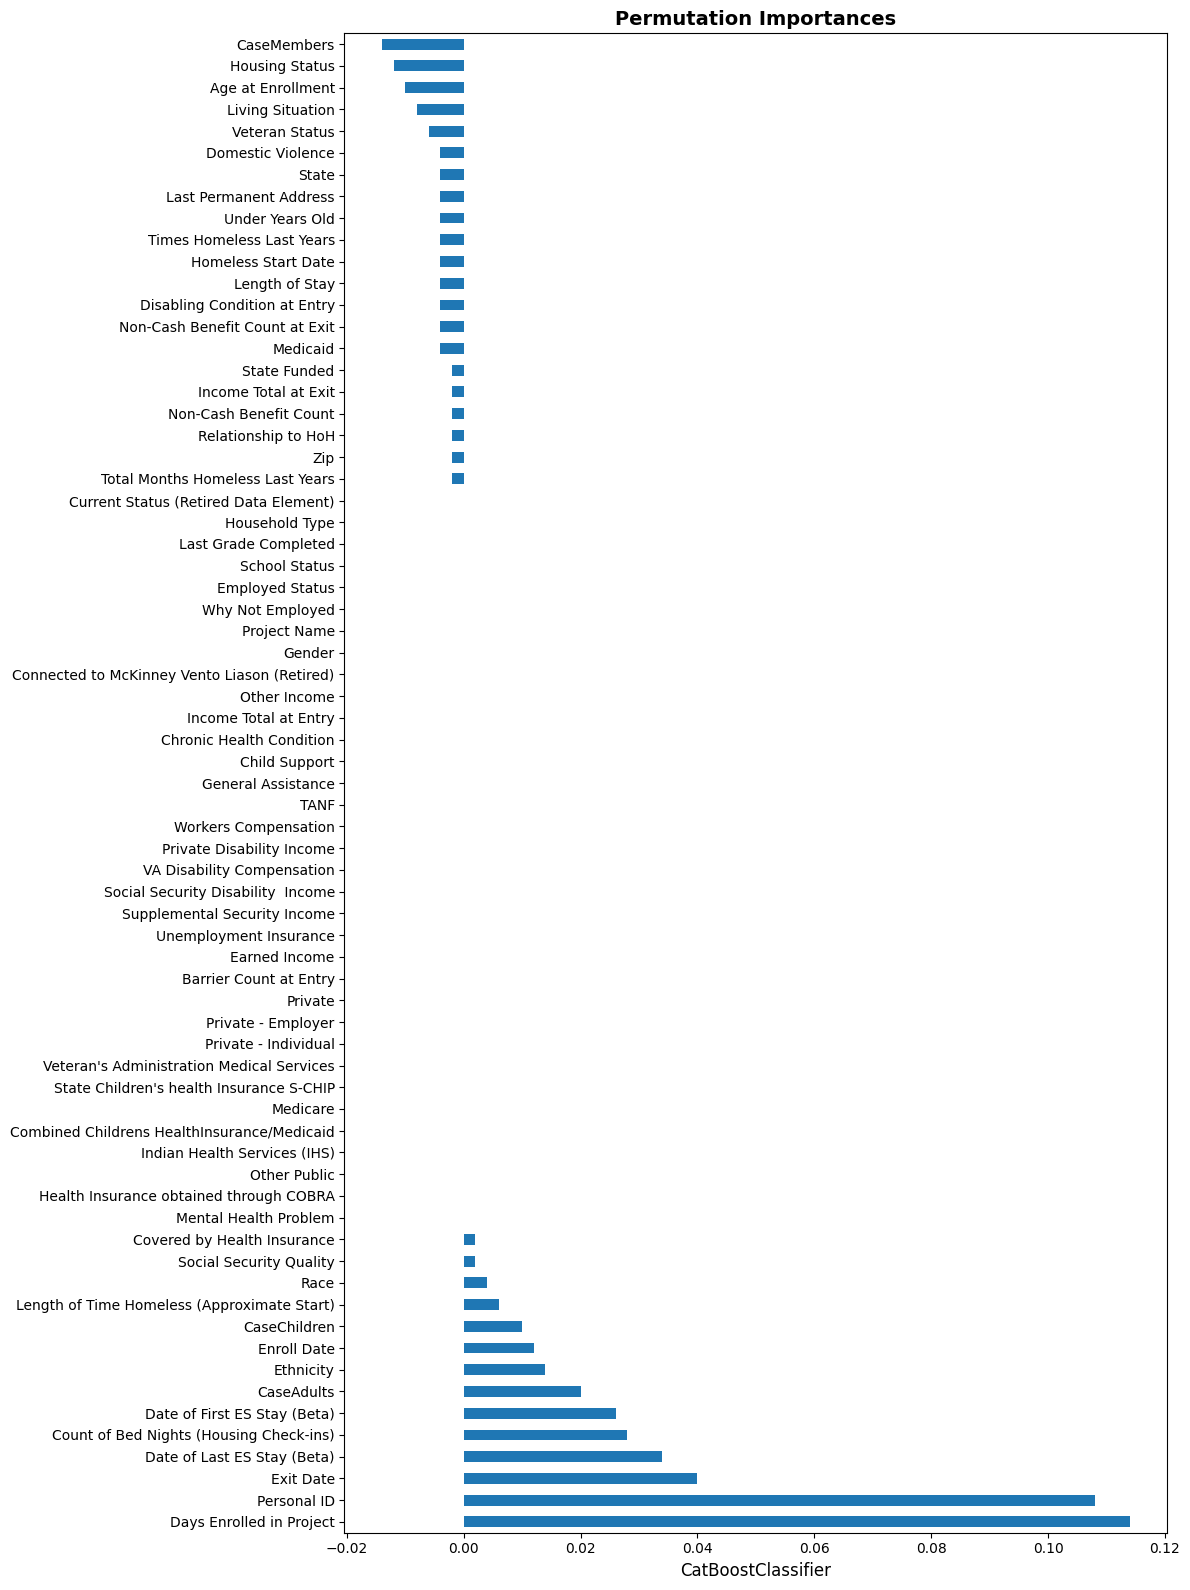

In [31]:
plt.subplots(figsize=(12,16))

cat_perm_imp.importances_mean.plot(kind='barh')

plt.title('Permutation Importances', fontsize=14, fontweight='bold')
plt.xlabel('CatBoostClassifier', fontsize=12)

plt.tight_layout()

#### `XGBoost`

In [32]:
xgb_perm_imp = permutation_importance(xgb_model, X_test, y_test, random_state=0)

In [33]:
data = {'importances_mean' : xgb_perm_imp['importances_mean'],
        'importances_std' : xgb_perm_imp['importances_std']}

xgb_perm_imp = pd.DataFrame(data, index=X.columns)
xgb_perm_imp.sort_values('importances_mean', ascending=False, inplace=True)

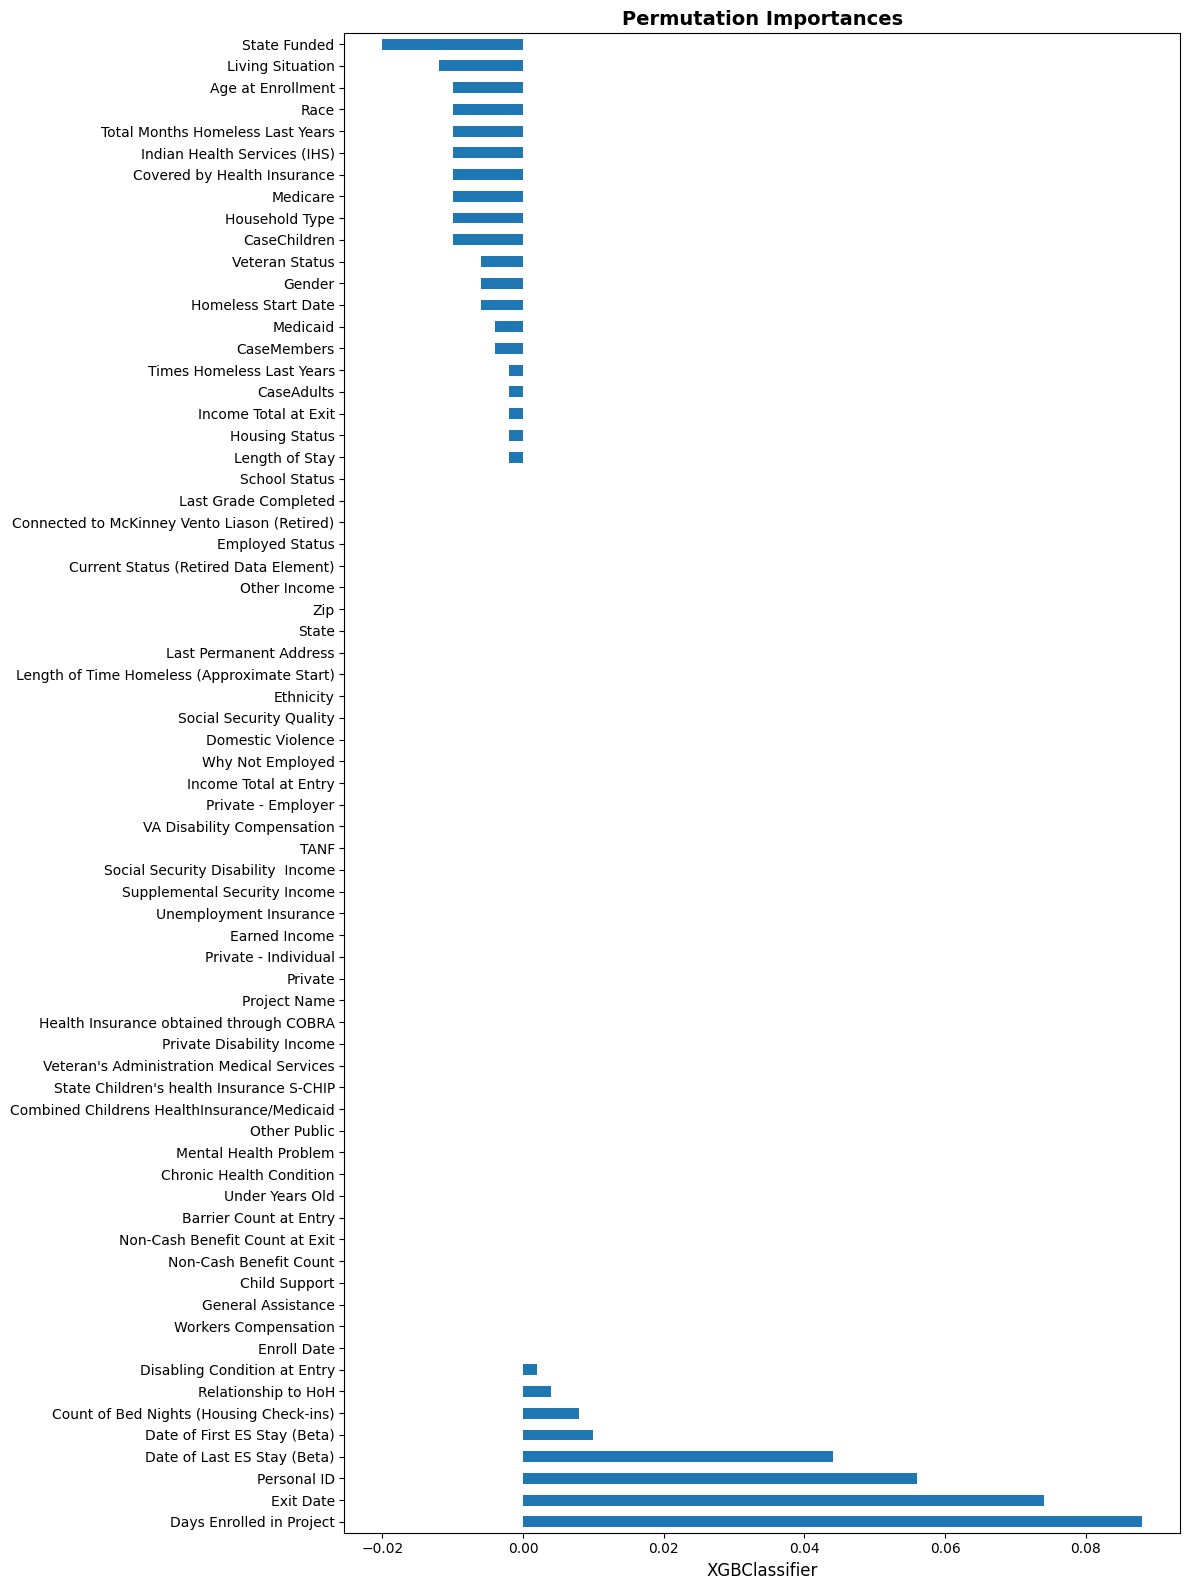

In [34]:
plt.subplots(figsize=(12,16))

xgb_perm_imp.importances_mean.plot(kind='barh')

plt.title('Permutation Importances', fontsize=14, fontweight='bold')
plt.xlabel('XGBClassifier', fontsize=12)

plt.tight_layout()

#### `RandomForest`

In [35]:
forest_perm_imp = permutation_importance(forest_model, X_test, y_test, random_state=0)

In [36]:
data = {'importances_mean' : forest_perm_imp['importances_mean'],
        'importances_std' : forest_perm_imp['importances_std']}

forest_perm_imp = pd.DataFrame(data, index=X.columns)
forest_perm_imp.sort_values('importances_mean', ascending=False, inplace=True)

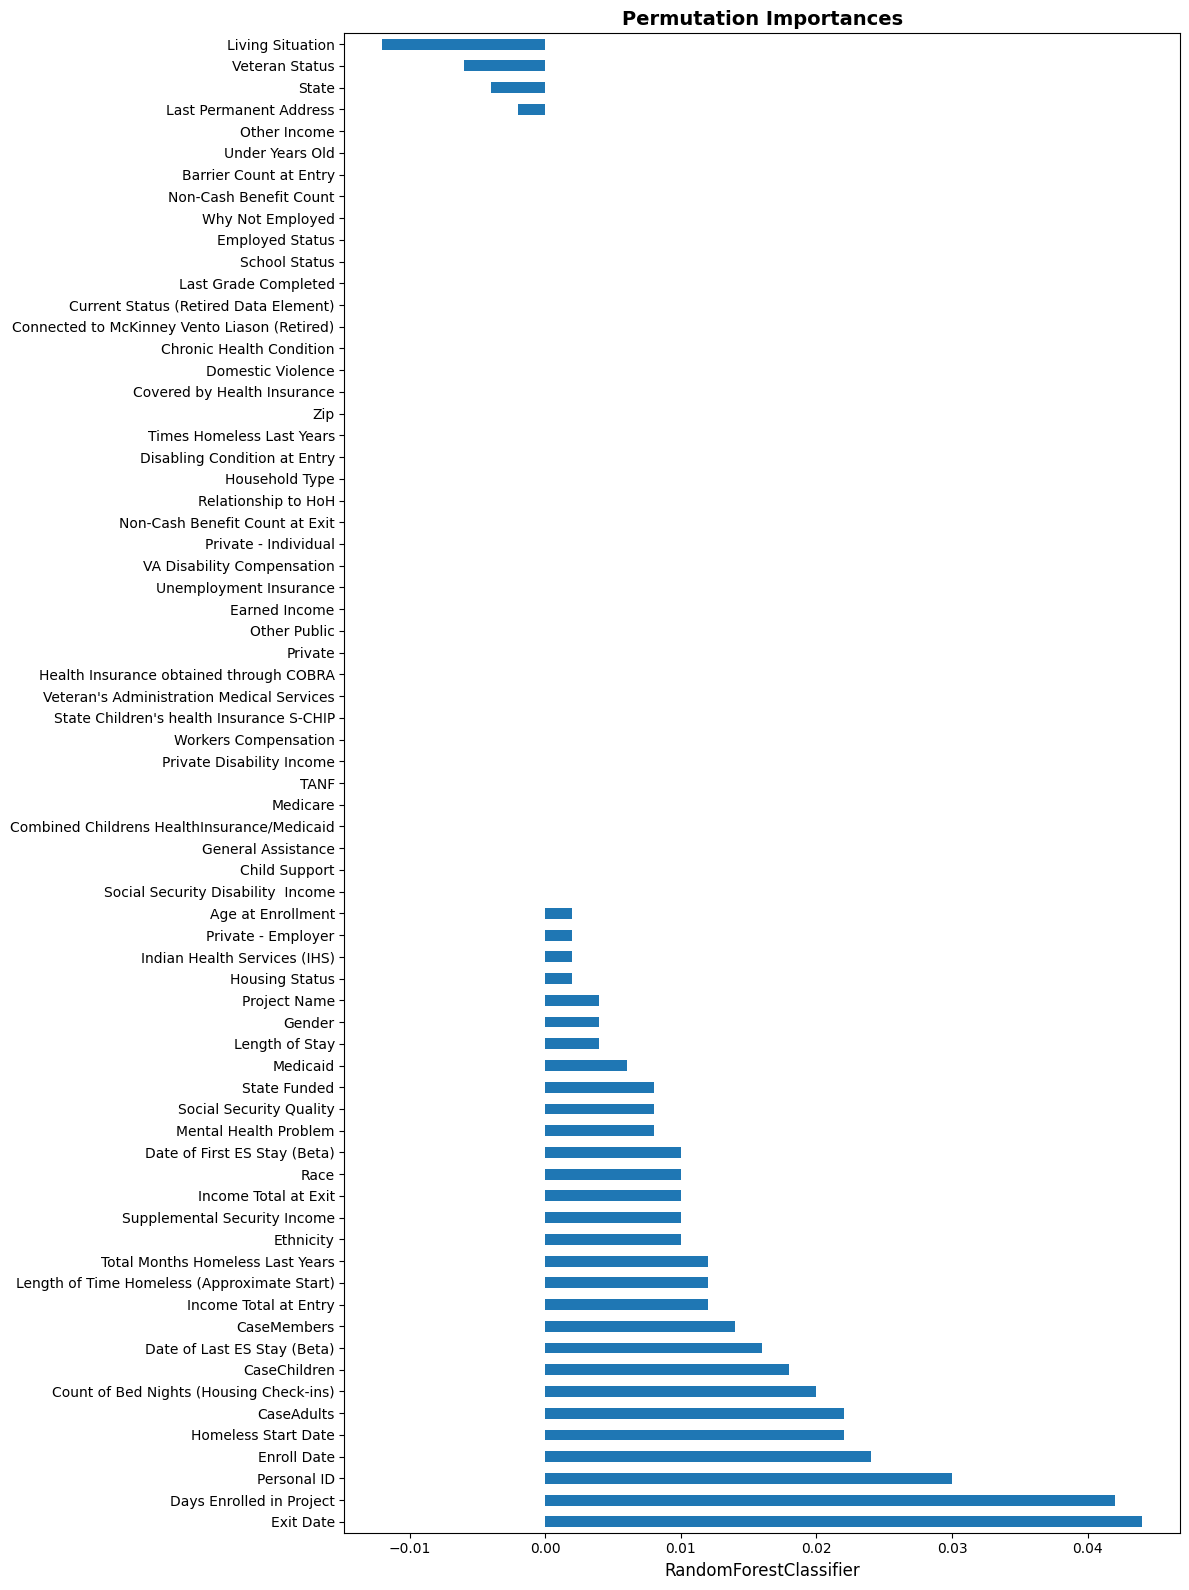

In [37]:
plt.subplots(figsize=(12,16))

forest_perm_imp.importances_mean.plot(kind='barh')

plt.title('Permutation Importances', fontsize=14, fontweight='bold')
plt.xlabel('RandomForestClassifier', fontsize=12)

plt.tight_layout()

## ELI5 Weights

#### `CatBoost`

In [38]:
show_weights(cat_model, feature_names=features, top=25)

Weight,Feature
0.1125,Personal ID
0.1124,Days Enrolled in Project
0.0875,Exit Date
0.0757,Count of Bed Nights (Housing Check-ins)
0.0686,Date of Last ES Stay (Beta)
0.0587,Enroll Date
0.0571,Date of First ES Stay (Beta)
0.0472,CaseMembers
0.0441,Race
0.0394,CaseChildren


#### `XGBoost`

In [39]:
show_weights(xgb_model, feature_names=features, top=25)

Weight,Feature
0.2257,Indian Health Services (IHS)
0.0762,State
0.0652,Income Total at Entry
0.0546,Supplemental Security Income
0.0478,Household Type
0.0390,Chronic Health Condition
0.0351,Length of Time Homeless (Approximate Start)
0.0326,Ethnicity
0.0320,Domestic Violence
0.0319,Income Total at Exit


#### `RandomForest`

In [40]:
show_weights(forest_model, feature_names=features, top=25)

Weight,Feature
0.0857 ± 0.0985,Exit Date
0.0797 ± 0.0932,Enroll Date
0.0766 ± 0.0800,Days Enrolled in Project
0.0740 ± 0.0802,Personal ID
0.0570 ± 0.0641,Count of Bed Nights (Housing Check-ins)
0.0550 ± 0.0639,Date of Last ES Stay (Beta)
0.0500 ± 0.0595,Date of First ES Stay (Beta)
0.0377 ± 0.0462,CaseMembers
0.0351 ± 0.0427,Age at Enrollment
0.0327 ± 0.0436,CaseChildren


## Shap

In [41]:
# Setup for all models force plots
row = X.iloc[[99]]
row_p = processor.transform(row)

### `CatBoost`

#### `Force Plot`

In [42]:
explainer = shap.TreeExplainer(cat_model)

In [43]:
shap_values_p = explainer.shap_values(row_p)

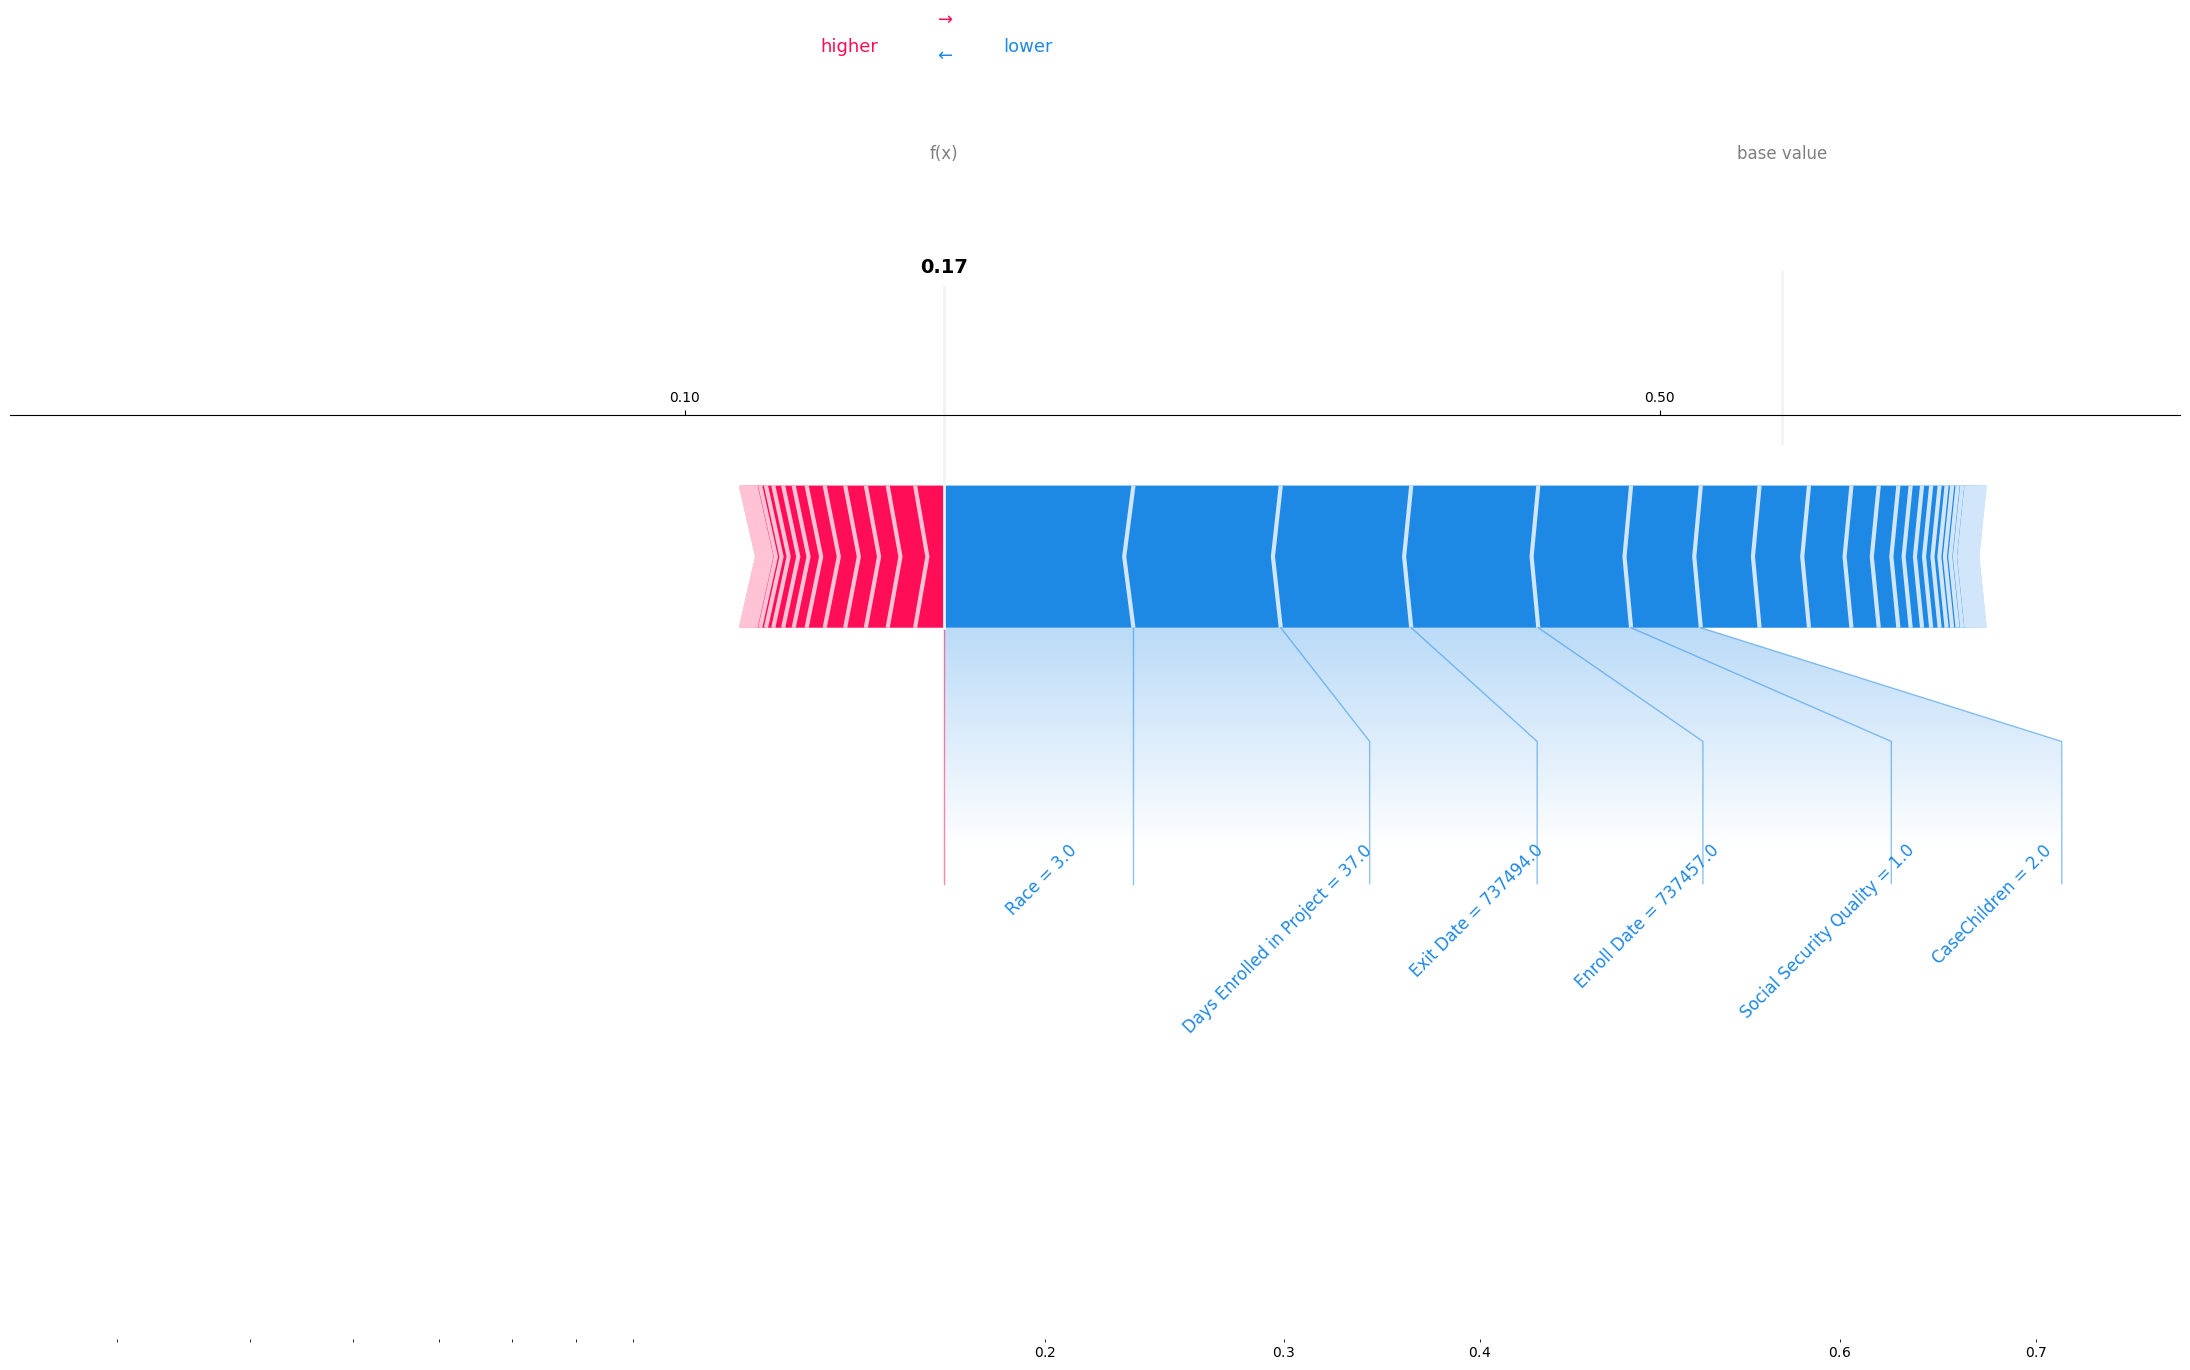

In [44]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values_p[0], 
    features=row_p,
    feature_names=column_names,
    link='logit'
).matplotlib(figsize=(28, 12), show=True, text_rotation=45)

#### `Summary Plot`

In [45]:
# Setup variable for all models
shap_values = explainer.shap_values(X_test)

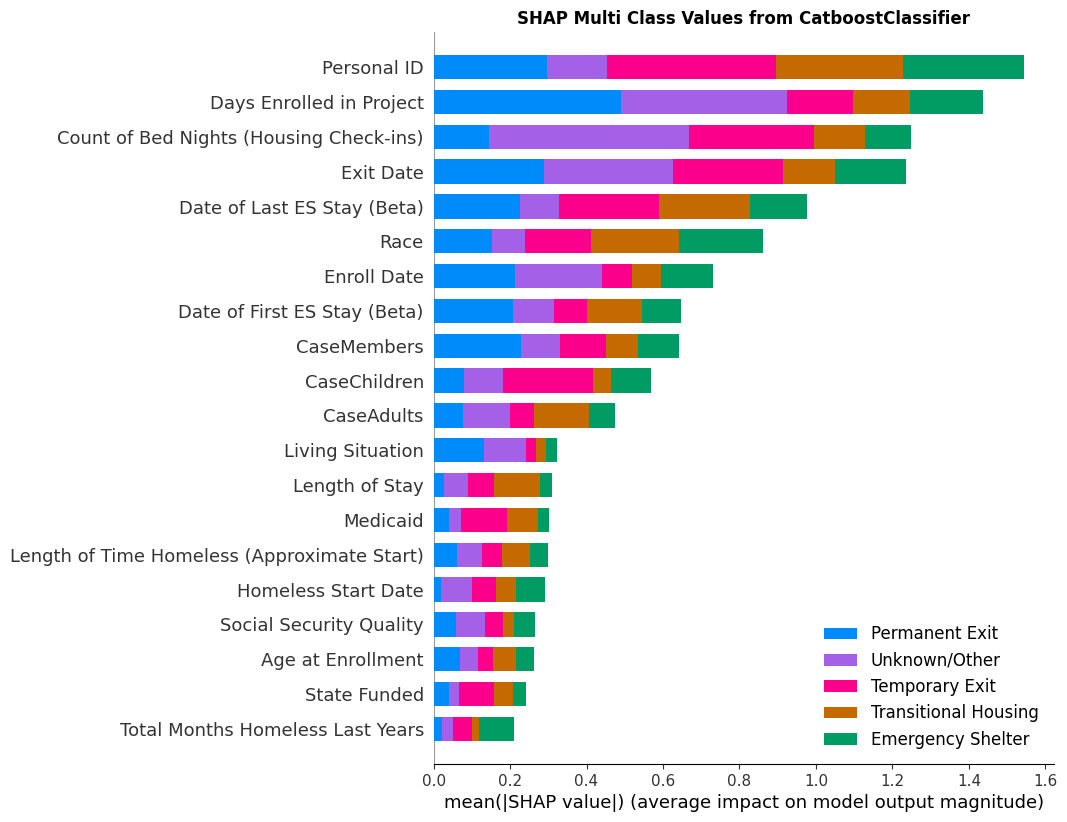

In [46]:
shap.summary_plot(shap_values, column_names, class_names=cat_model.classes_,
                  plot_type='bar', show=False, auto_size_plot=True)

plt.title('SHAP Multi Class Values from CatboostClassifier', fontsize=12, fontweight='bold')
plt.show()

### `XGBoost`

#### `Force Plot`

In [47]:
explainer = shap.TreeExplainer(xgb_model)
shap_values_p = explainer.shap_values(row_p)

In [48]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values_p[0], 
    features=row_p,
    feature_names=column_names,
    link='logit'
    
)

#### `Summary Plot`

In [49]:
explainer = shap.TreeExplainer(xgb_model)

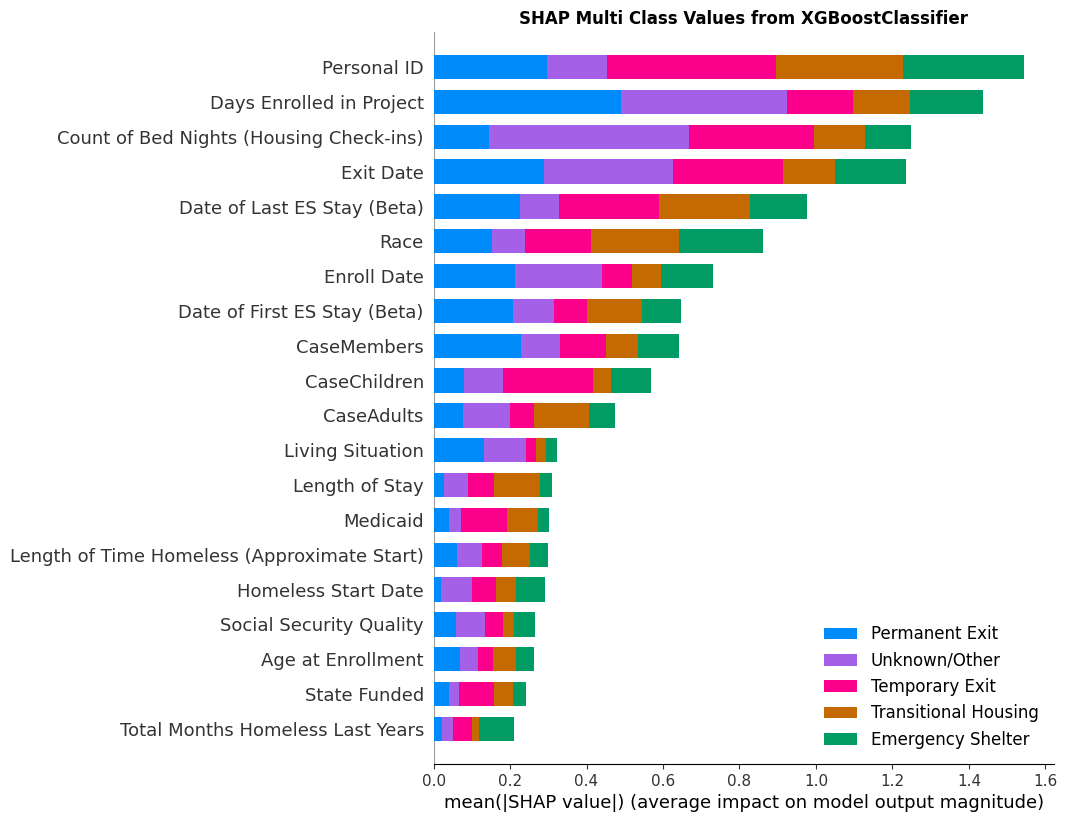

In [50]:
shap.summary_plot(shap_values, column_names, class_names=xgb_model.classes_,
                  plot_type='bar', show=False, auto_size_plot=True)

plt.title('SHAP Multi Class Values from XGBoostClassifier', fontsize=12, fontweight='bold')
plt.show()

### `RandomForest`

#### `Force Plot`

In [51]:
explainer = shap.TreeExplainer(forest_model)
shap_values_p = explainer.shap_values(row_p)

In [52]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values_p[0], 
    features=row_p,
    feature_names=column_names,
    link='logit'
    
)

#### `Summary Plot`

In [53]:
explainer = shap.TreeExplainer(forest_model)

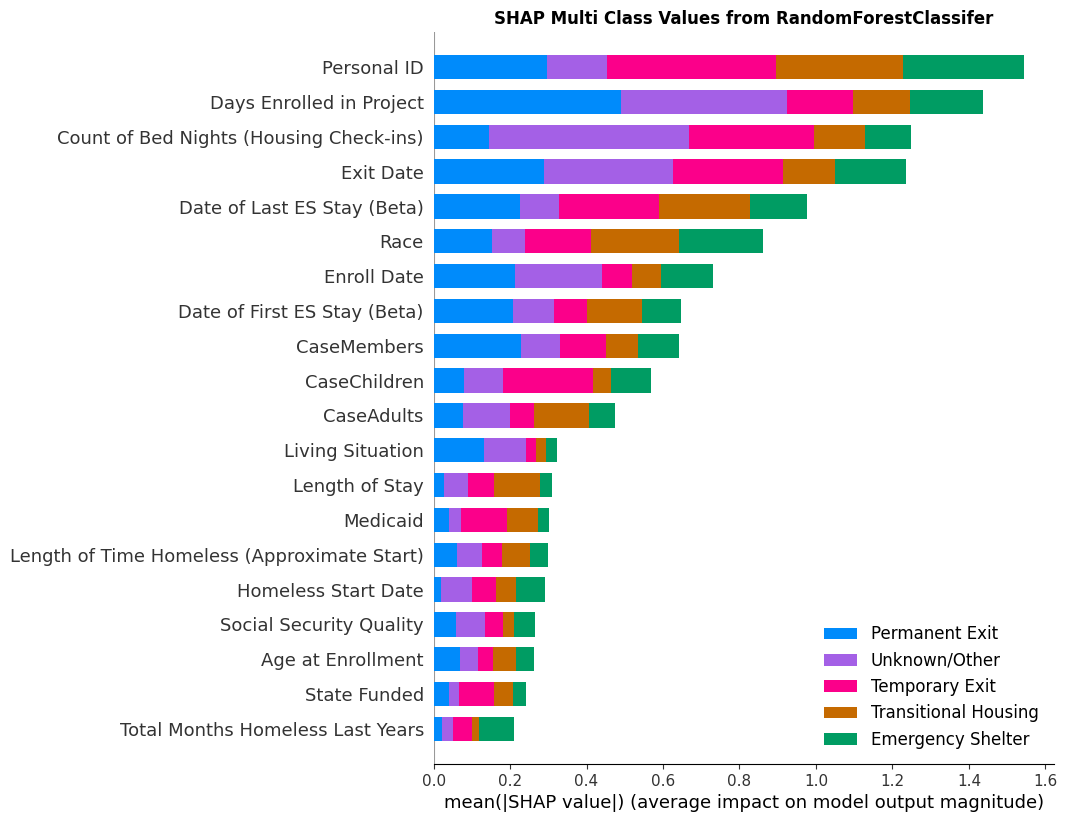

In [54]:
shap.summary_plot(shap_values, column_names, class_names=forest_model.classes_,
                  plot_type='bar', show=False, auto_size_plot=True)

plt.title('SHAP Multi Class Values from RandomForestClassifer', fontsize=12, fontweight='bold')
plt.show()

## Classification Reports

#### `CatBoost`

In [55]:
y_pred_c = cat_model.predict(X_test)
print(classification_report(y_test, y_pred_c))

                      precision    recall  f1-score   support

   Emergency Shelter       0.78      0.50      0.61        14
      Permanent Exit       0.84      0.96      0.90        45
      Temporary Exit       0.75      0.86      0.80         7
Transitional Housing       0.00      0.00      0.00         3
       Unknown/Other       0.84      0.87      0.86        31

            accuracy                           0.83       100
           macro avg       0.64      0.64      0.63       100
        weighted avg       0.80      0.83      0.81       100



#### `XGBoost`

In [56]:
y_pred_x = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_x))

                      precision    recall  f1-score   support

   Emergency Shelter       0.75      0.43      0.55        14
      Permanent Exit       0.86      0.93      0.89        45
      Temporary Exit       0.75      0.86      0.80         7
Transitional Housing       0.00      0.00      0.00         3
       Unknown/Other       0.77      0.87      0.82        31

            accuracy                           0.81       100
           macro avg       0.63      0.62      0.61       100
        weighted avg       0.78      0.81      0.79       100



#### `RandomForest`

In [57]:
y_pred_f = forest_model.predict(X_test)
print(classification_report(y_test, y_pred_f))

                      precision    recall  f1-score   support

   Emergency Shelter       0.83      0.36      0.50        14
      Permanent Exit       0.79      0.91      0.85        45
      Temporary Exit       0.83      0.71      0.77         7
Transitional Housing       0.00      0.00      0.00         3
       Unknown/Other       0.72      0.84      0.78        31

            accuracy                           0.77       100
           macro avg       0.64      0.56      0.58       100
        weighted avg       0.75      0.77      0.74       100



## Confusion Matrices

#### `CatBoost`

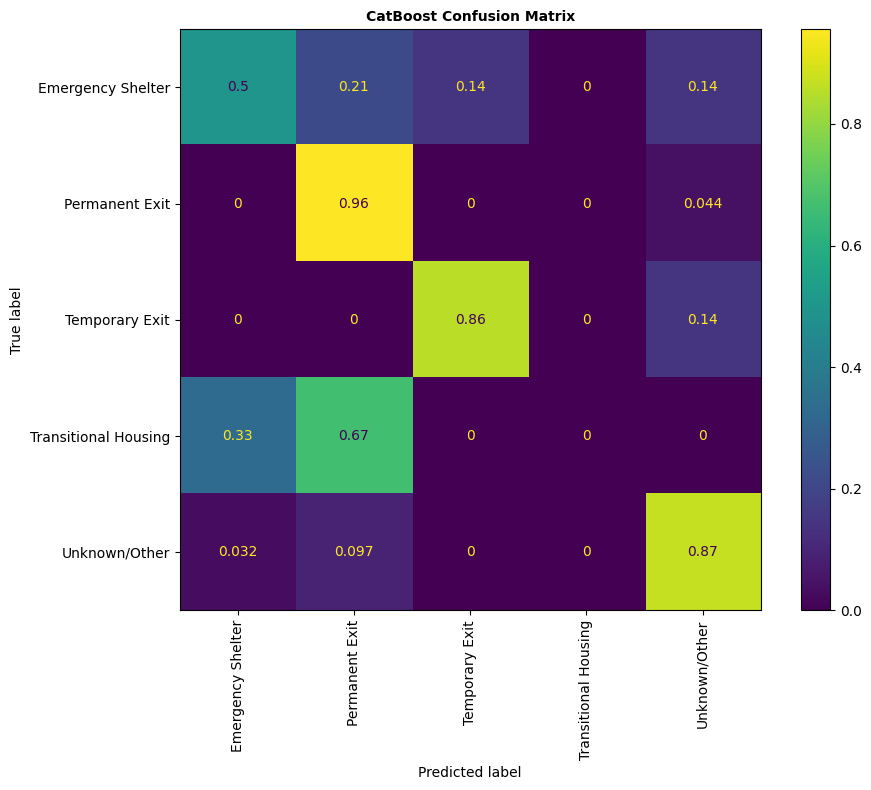

In [58]:
fig, ax1 = plt.subplots(figsize=(10,8))

plot_confusion_matrix(cat_model, X_test, y_test, 
                      normalize='true', xticks_rotation='vertical', ax=ax1)

ax1.set_title('CatBoost Confusion Matrix', fontsize=10, fontweight='bold')
ax1.grid(False)
plt.tight_layout()

#### `XGBoost`

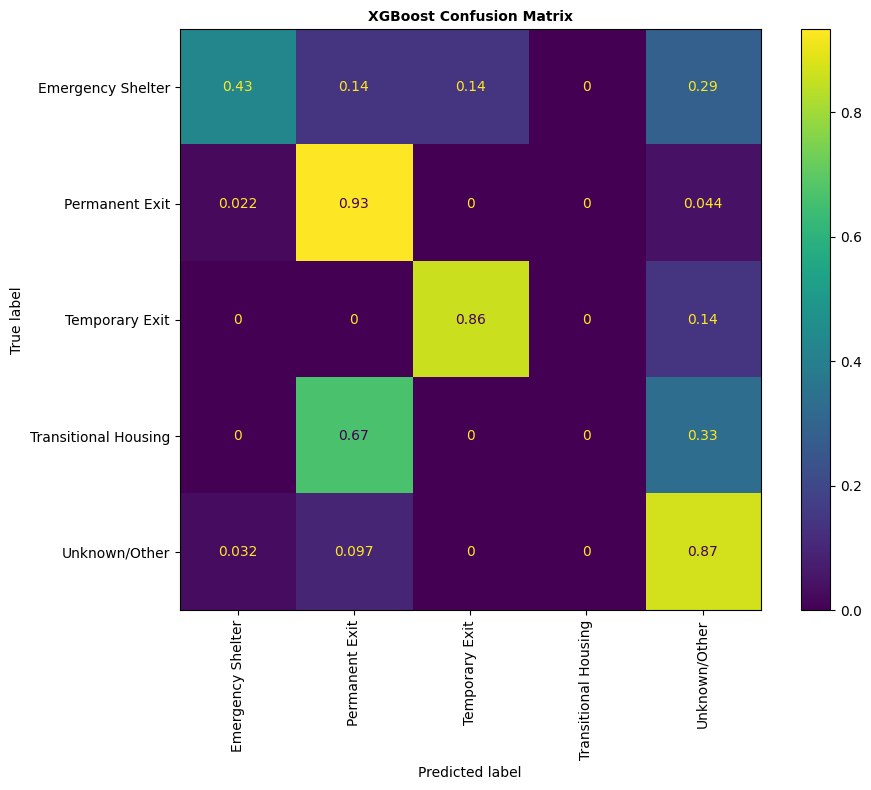

In [59]:
fig, ax2 = plt.subplots(figsize=(10,8))

plot_confusion_matrix(xgb_model, X_test, y_test, 
                      normalize='true', xticks_rotation='vertical', ax=ax2)

ax2.set_title('XGBoost Confusion Matrix', fontsize=10, fontweight='bold')
ax2.grid(False)
plt.tight_layout()

#### `RandomForest`

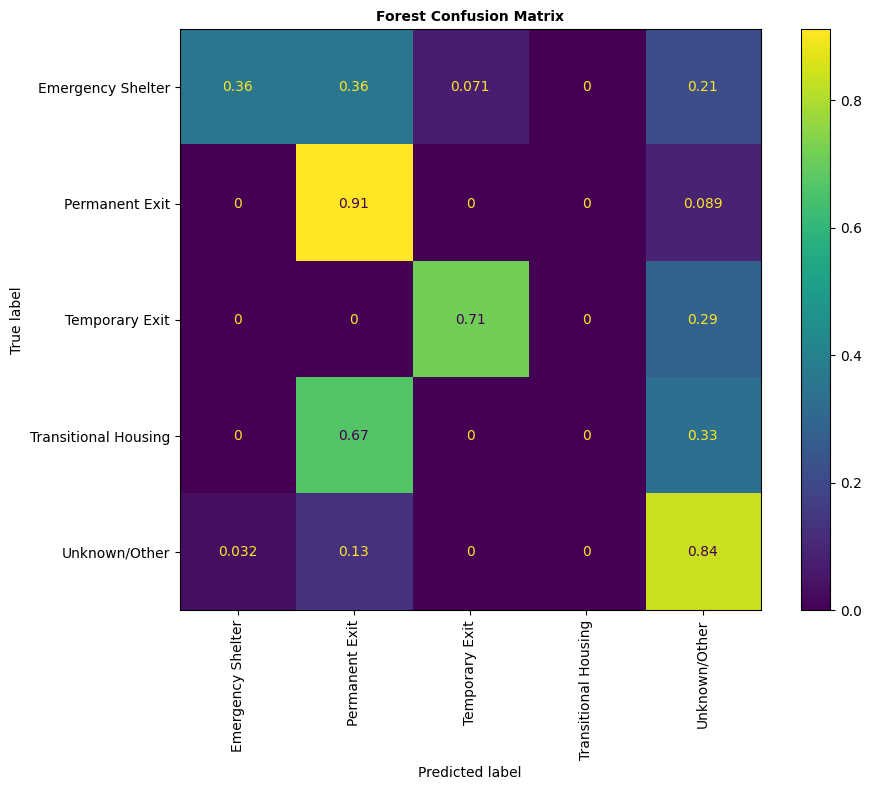

In [60]:
fig, ax3 = plt.subplots(figsize=(10,8))

plot_confusion_matrix(forest_model, X_test, y_test, 
                      normalize='true', xticks_rotation='vertical', ax=ax3)

ax3.set_title('Forest Confusion Matrix', fontsize=10, fontweight='bold')
ax3.grid(False)
plt.tight_layout()

## PDP Features Plot

In [61]:
X_pdp = pd.DataFrame(X_train, columns=column_names)

#### `Catboost`

2021-02-02 15:15:00.273 WARNING matplotlib.font_manager: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
2021-02-02 15:15:00.276 WARNING matplotlib.font_manager: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
2021-02-02 15:15:00.281 WARNING matplotlib.font_manager: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
2021-02-02 15:15:00.289 WARNING matplotlib.font_manager: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


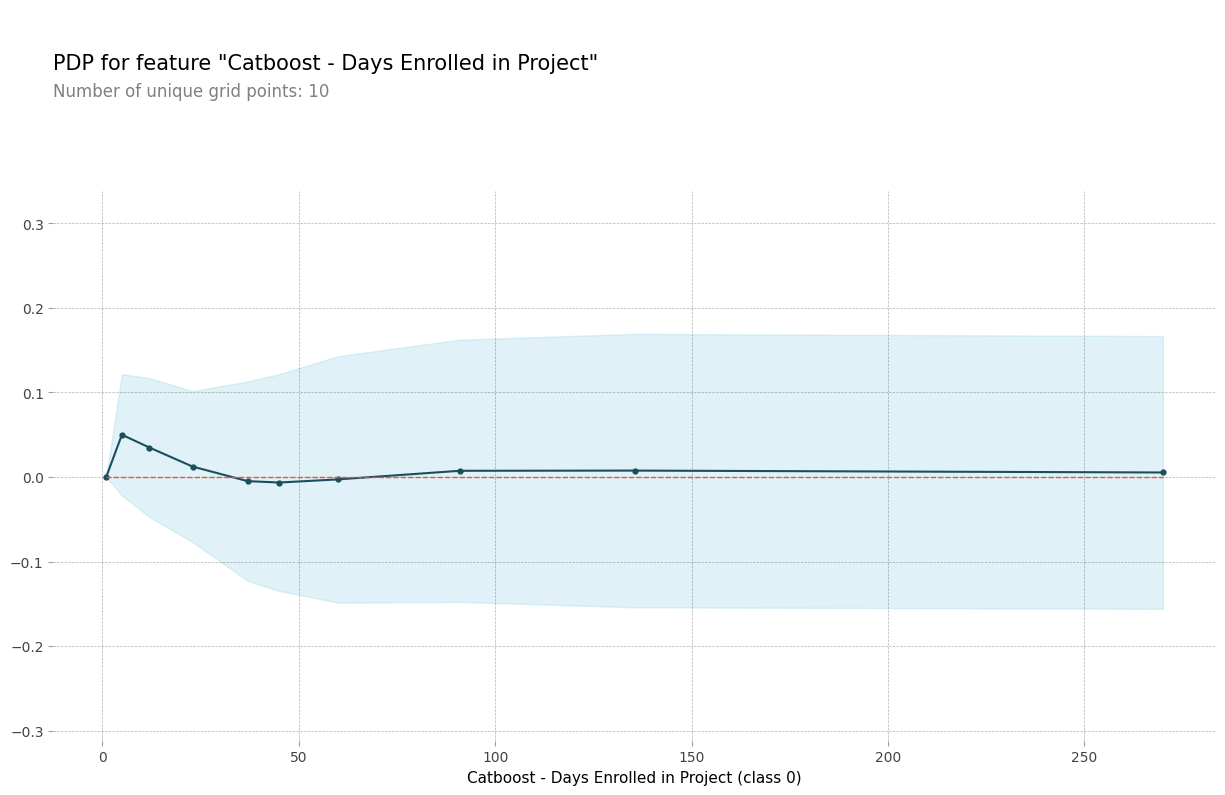

In [62]:
feature = 'Days Enrolled in Project'
feature_name = 'Catboost - Days Enrolled in Project'

isolated = pdp_isolate(
    model=cat_model,
    dataset=X_pdp,
    model_features=X_pdp.columns,
    feature=feature,
    n_jobs=-1
)

pdp_plot(isolated[0], feature_name=feature_name)
plt.tight_layout()
plt.show();

#### `XGBoost`

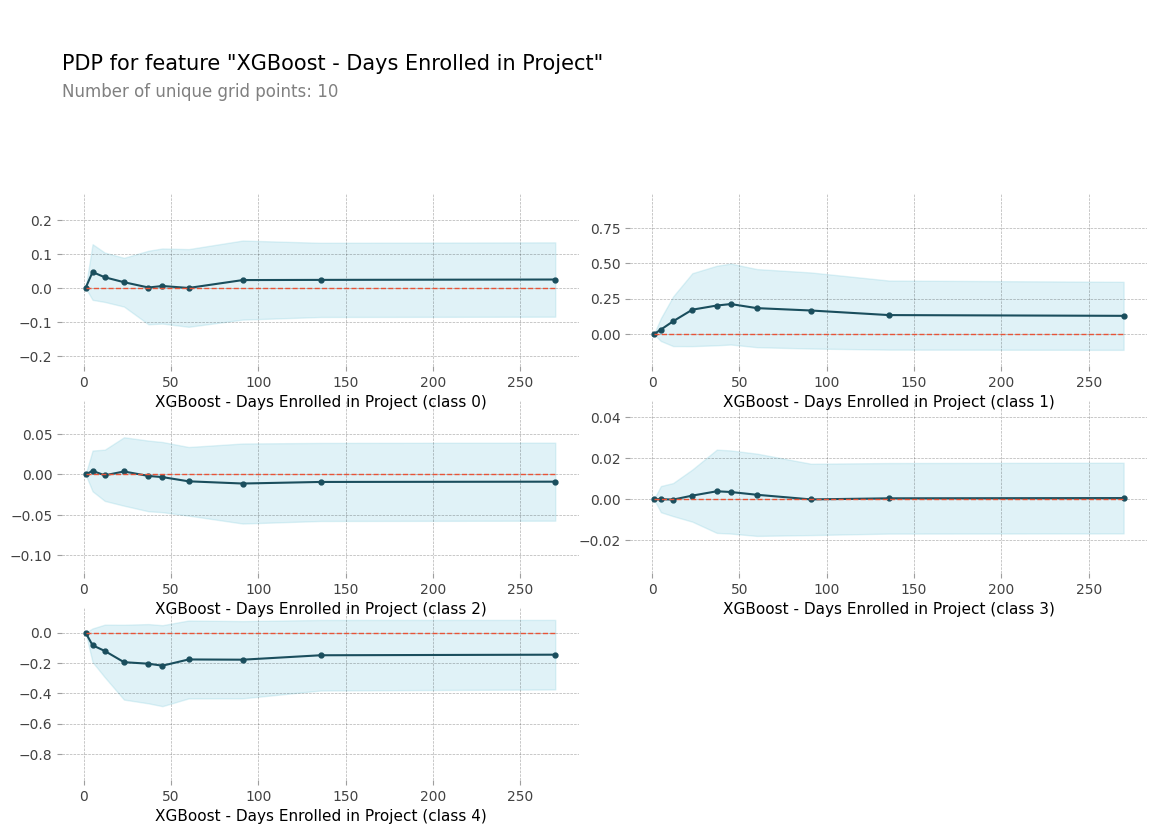

In [63]:
feature = 'Days Enrolled in Project'
feature_name = 'XGBoost - Days Enrolled in Project'

isolated = pdp_isolate(
    model=xgb_model,
    dataset=X_pdp,
    model_features=X_pdp.columns,
    feature=feature,
    n_jobs=-1
)

pdp_plot(isolated, feature_name=feature_name, figsize=(14,10))
plt.tight_layout()
plt.show();

#### `RandomForest`

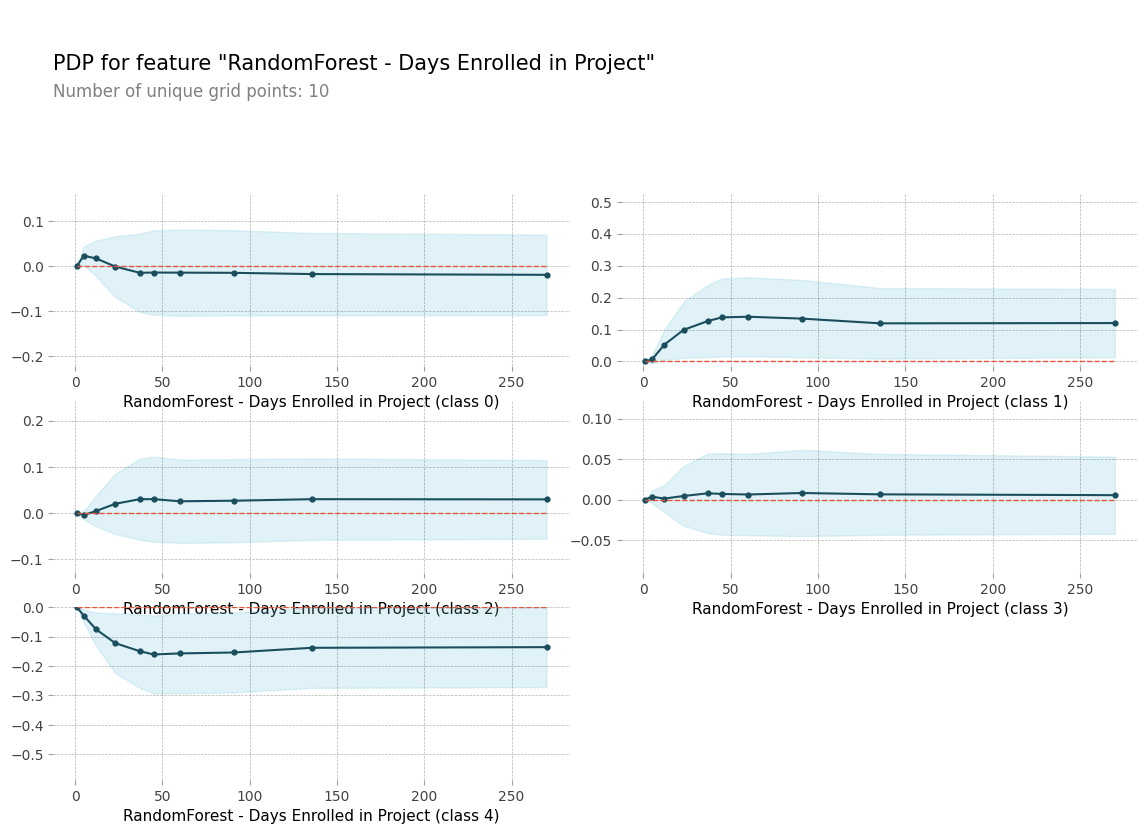

In [64]:
feature = 'Days Enrolled in Project'
feature_name = 'RandomForest - Days Enrolled in Project'

isolated = pdp_isolate(
    model=forest_model,
    dataset=X_pdp,
    model_features=X_pdp.columns,
    feature=feature,
    n_jobs=-1
)

pdp_plot(isolated, feature_name=feature_name, figsize=(14,10))
plt.tight_layout()
plt.show();